# Heart Risk Assessment Using Machine Learning Classifiers on Wearable IoT Devices

In [1]:
# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import os
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

## Importing dataset

In [3]:
df_train = pd.read_csv("Dataset.csv", header=None)
df_train

0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
87549  0.396491  0.284211  0.136842  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87550  0.001667  0.000000  0.013333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87551  0.387755  0.322449  0.191837  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87552  0.121519  0.118987  0.103797  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87553  0.427578  0.395133  0.402086  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
87549  0.0  0.0  4.0  
87550  0.0  0.0  4.0  
87551  0.0  0.0  4.0  
87552  0.0  0.0  4.0  
87553  0.0  0.0  4.0  

[87554 rows x 188 columns]

### show one data

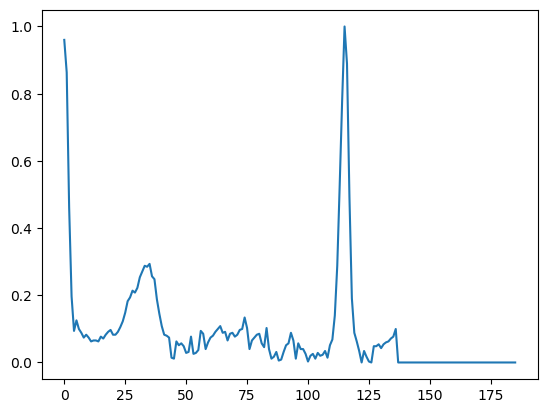

In [4]:
plt.plot(df_train.iloc[1,:186])

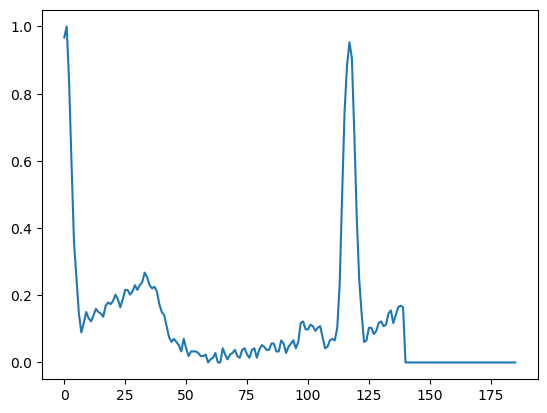

In [5]:
plt.plot(df_train.iloc[4,:186])

## Dataset 

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


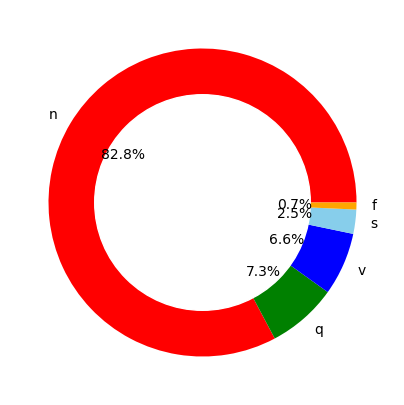

In [6]:
# plot the circle of value counts in dataset
def plot_equilibre(equilibre):
    plt.figure(figsize=(5,5))
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()
print(df_train[187].value_counts())
plot_equilibre(df_train[187].value_counts())

In [7]:
# Defining Dependent and independent variables

In [8]:
X= df_train.values[:, :-1]
X

array([[0.97794116, 0.92647058, 0.68137252, ..., 0.        , 0.        ,
        0.        ],
       [0.96011394, 0.86324787, 0.46153846, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.65945947, 0.18648648, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.90612245, 0.62448978, 0.59591836, ..., 0.        , 0.        ,
        0.        ],
       [0.85822785, 0.64556962, 0.84556961, ..., 0.        , 0.        ,
        0.        ],
       [0.90150636, 0.84588647, 0.80069524, ..., 0.        , 0.        ,
        0.        ]])

In [9]:
y= df_train.values[:, -1].astype(int)
y

array([0, 0, 0, ..., 4, 4, 4])

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(70043, 187)

In [12]:
X_test.shape

(17511, 187)

In [13]:
labels = ["Normal",
          "Artial Premature",
          "Premature ventricular contraction",
          "Fusion of ventricular and normal",
          "Fusion of paced and normal"]

In [14]:
#defining global variables to store accuracy and other metrics
precision = []
recall = []
fscore = []
accuracy = []

In [15]:
#function to calculate various metrics such as accuracy, precision etc
def calculateMetrics(algorithm, predict, testY):
    testY = testY.astype('int')
    predict = predict.astype('int')
    p = precision_score(testY, predict,average='macro') * 100
    r = recall_score(testY, predict,average='macro') * 100
    f = f1_score(testY, predict,average='macro') * 100
    a = accuracy_score(testY,predict)*100 
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+' Accuracy    : '+str(a))
    print(algorithm+' Precision   : '+str(p))
    print(algorithm+' Recall      : '+str(r))
    print(algorithm+' FSCORE      : '+str(f))
    report=classification_report(predict, testY,target_names=labels)
    print('\n',algorithm+" classification report\n",report)
    conf_matrix = confusion_matrix(testY, predict) 
    plt.figure(figsize =(5, 5)) 
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="Blues" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.ylabel('True class') 
    plt.xlabel('Predicted class') 
    plt.show()

# Knearest Neighbours Classifier

KNN Classifier Accuracy    : 96.51076466221232
KNN Classifier Precision   : 92.07132734527947
KNN Classifier Recall      : 79.39902043717669
KNN Classifier FSCORE      : 84.76812921313184

 KNN Classifier classification report
                                    precision    recall  f1-score   support

                           Normal       0.99      0.97      0.98     14932
                 Artial Premature       0.61      0.89      0.72       290
Premature ventricular contraction       0.81      0.91      0.85       990
 Fusion of ventricular and normal       0.62      0.85      0.72       106
       Fusion of paced and normal       0.94      0.99      0.96      1193

                         accuracy                           0.97     17511
                        macro avg       0.79      0.92      0.85     17511
                     weighted avg       0.97      0.97      0.97     17511



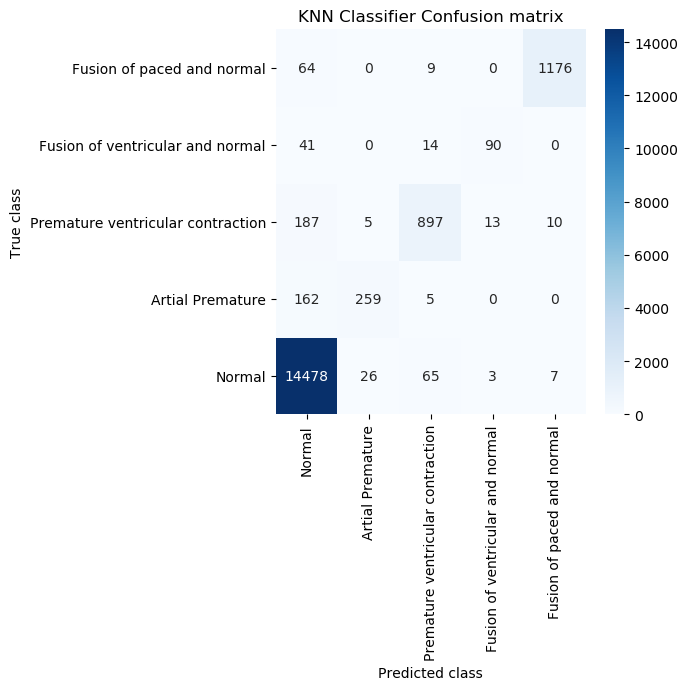

In [16]:
# Check if the pkl file exists
if os.path.exists('KNN_weights.pkl'):
    # Load the model from the pkl file
    classifier= joblib.load('KNN_weights.pkl')
    predict = classifier.predict(X_test)
    calculateMetrics("KNN Classifier", predict, y_test)
else:
    classifier = KNeighborsClassifier(n_neighbors=20)
    # Train the classifier on the training data
    classifier.fit(X_train, y_train)
    # Make predictions on the test data
    predict=classifier.predict(X_test)
    # Save the model weights to a pkl file
    joblib.dump(classifier, 'KNN_weights.pkl')
    print("KNN classifier_model trained and model weights saved.")
    calculateMetrics("KNeighborsClassifier", predict, y_test)

# RandomForestClassifier

RandomForestClassifier Accuracy    : 97.48729370110216
RandomForestClassifier Precision   : 96.46819735940551
RandomForestClassifier Recall      : 81.44330497363718
RandomForestClassifier FSCORE      : 87.57155572673732

 RandomForestClassifier classification report
                                    precision    recall  f1-score   support

                           Normal       1.00      0.97      0.99     14935
                 Artial Premature       0.63      0.98      0.77       272
Premature ventricular contraction       0.87      0.96      0.92      1005
 Fusion of ventricular and normal       0.62      0.91      0.74        99
       Fusion of paced and normal       0.96      0.99      0.97      1200

                         accuracy                           0.97     17511
                        macro avg       0.81      0.96      0.88     17511
                     weighted avg       0.98      0.97      0.98     17511



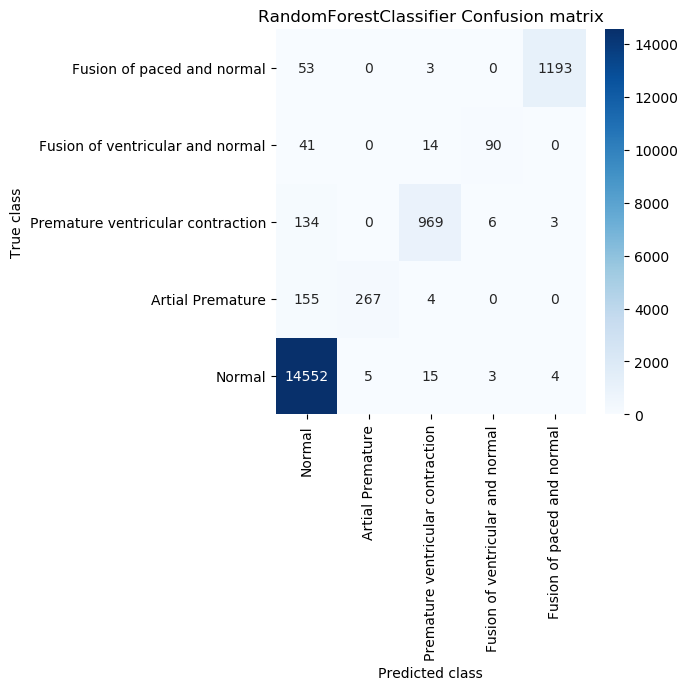

In [17]:
# Check if the pkl file exists
if os.path.exists('rf_classifier_weights.pkl'):
    # Load the model from the pkl file
    rf_classifier= joblib.load('rf_classifier_weights.pkl')
    predict = rf_classifier.predict(X_test)
    calculateMetrics("RandomForestClassifier", predict, y_test)
else:
    rf_classifier = RandomForestClassifier()
    # Train the classifier on the training data
    rf_classifier.fit(X_train, y_train)
    # Make predictions on the test data
    predict=rf_classifier.predict(X_test)
    joblib.dump(rf_classifier, 'rf_classifier_weights.pkl')
    print("rf_classifier_model trained and model weights saved.")
    calculateMetrics("RandomForestClassifier", predict, y_test)

In [18]:
#Performance Comparision of both the algorithmns

In [19]:
#showing all algorithms performance values
columns = ["Algorithm Name","Precison","Recall","FScore","Accuracy"]
values = []
algorithm_names = ["KNeighborsClassifier", "RandomForestClassifier"]
for i in range(len(algorithm_names)):
    values.append([algorithm_names[i],precision[i],recall[i],fscore[i],accuracy[i]])
    
temp = pd.DataFrame(values,columns=columns)
temp

Algorithm Name   Precison     Recall     FScore   Accuracy
0    KNeighborsClassifier  92.071327  79.399020  84.768129  96.510765
1  RandomForestClassifier  96.468197  81.443305  87.571556  97.487294

In [20]:
filename=r"test.csv"

In [21]:
dataset = pd.read_csv(filename)

A='Normal'
B='Artial Premature'
C='Premature ventricular contraction'
D='Fusion of ventricular and normal'
E='Fusion of paced and normal'

predict = rf_classifier.predict(dataset)
for i in range(len(predict)):
    if predict[i] == 0:
        print("{} :{} ".format(dataset.iloc[i,:],A))
    elif predict[i]== 1:
        print("{} :{} ".format(dataset.iloc[i, :],B))
    elif predict[i]== 2:
        print("{} :{} ".format(dataset.iloc[i, :],C))
    elif predict[i]==3:
        print("{} :{} ".format(dataset.iloc[i, :],D))
    else:
        print("{} :{} ".format(dataset.iloc[i,:],E))


1.00E+00       0.908
7.58E-01       0.784
1.12E-01       0.531
0.00E+00       0.363
8.06E-02       0.366
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 0, Length: 187, dtype: float64 :Normal 
1.00E+00       0.730
7.58E-01       0.212
1.12E-01       0.000
0.00E+00       0.119
8.06E-02       0.102
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.910
1.12E-01       0.681
0.00E+00       0.473
8.06E-02       0.229
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2, Length: 187, dtype: float64 :Normal 
1.00E+00       0.570
7.58E-01       0.399
1.12E-01       0.238
0.00E+00       0.148
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0

1.00E+00       1.0000
7.58E-01       0.7190
1.12E-01       0.0000
0.00E+00       0.0559
8.06E-02       0.0559
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 141, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8440
1.12E-01       0.2980
0.00E+00       0.0000
8.06E-02       0.0874
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 142, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7770
1.12E-01       0.3710
0.00E+00       0.0227
8.06E-02       0.0417
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 143, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5190
1.12E-01       0.0450
0.00E+00       0.0934
8.06E-02       0.1140
                ... 

1.00E+00       0.961
7.58E-01       0.872
1.12E-01       0.578
0.00E+00       0.328
8.06E-02       0.150
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 239, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9670
7.58E-01       0.9220
1.12E-01       0.4380
0.00E+00       0.0453
8.06E-02       0.0766
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 240, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.994
1.12E-01       0.744
0.00E+00       0.463
8.06E-02       0.390
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 241, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.627
1.12E-01       0.132
0.00E+00       0.127
8.06E-02       0.110
               ...  
0.00E+00.60    0.000
0.00E

1.00E+00       1.0000
7.58E-01       0.7190
1.12E-01       0.4980
0.00E+00       0.2170
8.06E-02       0.0522
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 339, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.4910
1.12E-01       0.0773
0.00E+00       0.0923
8.06E-02       0.0998
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 340, Length: 187, dtype: float64 :Normal 
1.00E+00       0.975
7.58E-01       0.700
1.12E-01       0.288
0.00E+00       0.000
8.06E-02       0.070
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 341, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9460
7.58E-01       1.0000
1.12E-01       0.4510
0.00E+00       0.0641
8.06E-02       0.0240
                ...  
0.00E+00.

1.00E+00       1.000
7.58E-01       0.915
1.12E-01       0.371
0.00E+00       0.153
8.06E-02       0.153
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 502, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6290
1.12E-01       0.0000
0.00E+00       0.0691
8.06E-02       0.1670
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 503, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.947
1.12E-01       0.770
0.00E+00       0.591
8.06E-02       0.552
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 504, Length: 187, dtype: float64 :Normal 
1.00E+00       0.91000
7.58E-01       0.68200
1.12E-01       0.33300
0.00E+00       0.00000
8.06E-02       0.00749
                ...   
0.00E+00.60   

1.00E+00       0.6590
7.58E-01       0.3150
1.12E-01       0.0000
0.00E+00       0.1050
8.06E-02       0.0974
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 623, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.858
1.12E-01       0.437
0.00E+00       0.193
8.06E-02       0.263
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 624, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8850
1.12E-01       0.2170
0.00E+00       0.0000
8.06E-02       0.0745
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 625, Length: 187, dtype: float64 :Normal 
1.00E+00       0.5850
7.58E-01       0.4230
1.12E-01       0.2660
0.00E+00       0.1370
8.06E-02       0.0282
                ...  
0.00E+00.

1.00E+00       0.966
7.58E-01       0.823
1.12E-01       0.398
0.00E+00       0.207
8.06E-02       0.147
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 725, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9280
1.12E-01       0.3740
0.00E+00       0.0619
8.06E-02       0.3000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 726, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.929
1.12E-01       0.708
0.00E+00       0.505
8.06E-02       0.273
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 727, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0192
7.58E-01       0.0256
1.12E-01       0.2050
0.00E+00       0.4230
8.06E-02       0.5320
                ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.918
1.12E-01       0.533
0.00E+00       0.216
8.06E-02       0.175
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 872, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9280
7.58E-01       0.9690
1.12E-01       0.5360
0.00E+00       0.1090
8.06E-02       0.0414
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 873, Length: 187, dtype: float64 :Normal 
1.00E+00       0.984
7.58E-01       0.870
1.12E-01       0.533
0.00E+00       0.122
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 874, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7850
1.12E-01       0.0000
0.00E+00       0.0184
8.06E-02       0.0307
                ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.917
1.12E-01       0.732
0.00E+00       0.535
8.06E-02       0.382
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 983, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.811
1.12E-01       0.348
0.00E+00       0.107
8.06E-02       0.109
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 984, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9550
7.58E-01       0.7460
1.12E-01       0.5000
0.00E+00       0.2130
8.06E-02       0.0246
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 985, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0148
7.58E-01       0.0623
1.12E-01       0.2340
0.00E+00       0.4210
8.06E-02       0.4070
                ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.903
1.12E-01       0.735
0.00E+00       0.492
8.06E-02       0.265
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1078, Length: 187, dtype: float64 :Normal 
1.00E+00       0.593
7.58E-01       0.789
1.12E-01       1.000
0.00E+00       0.469
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1079, Length: 187, dtype: float64 :Normal 
1.00E+00       0.862
7.58E-01       0.855
1.12E-01       0.677
0.00E+00       0.375
8.06E-02       0.119
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1080, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9140
1.12E-01       0.4640
0.00E+00       0.1300
8.06E-02       0.0909
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       0.868
7.58E-01       0.672
1.12E-01       0.203
0.00E+00       0.127
8.06E-02       0.095
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1149, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.980
1.12E-01       0.431
0.00E+00       0.150
8.06E-02       0.105
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1150, Length: 187, dtype: float64 :Normal 
1.00E+00       0.987
7.58E-01       0.813
1.12E-01       0.122
0.00E+00       0.000
8.06E-02       0.112
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1151, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5670
1.12E-01       0.0315
0.00E+00       0.0827
8.06E-02       0.1460
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       1.000
7.58E-01       0.903
1.12E-01       0.501
0.00E+00       0.344
8.06E-02       0.342
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1257, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.630
1.12E-01       0.293
0.00E+00       0.231
8.06E-02       0.172
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1258, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9650
7.58E-01       0.8690
1.12E-01       0.4790
0.00E+00       0.0603
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1259, Length: 187, dtype: float64 :Normal 
1.00E+00       0.93000
7.58E-01       0.78400
1.12E-01       0.49900
0.00E+00       0.18500
8.06E-02       0.00879
                ...   
0.00E+00.60

1.00E+00       0.0000
7.58E-01       0.5190
1.12E-01       0.8440
0.00E+00       0.0667
8.06E-02       0.0222
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1350, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9700
7.58E-01       0.7310
1.12E-01       0.3110
0.00E+00       0.0000
8.06E-02       0.0833
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1351, Length: 187, dtype: float64 :Normal 
1.00E+00       0.947
7.58E-01       0.821
1.12E-01       0.297
0.00E+00       0.000
8.06E-02       0.210
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1352, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.953
1.12E-01       0.604
0.00E+00       0.212
8.06E-02       0.199
               ...  
0.00E+00.60 

1.00E+00       1.0000
7.58E-01       0.7110
1.12E-01       0.2280
0.00E+00       0.0709
8.06E-02       0.0971
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1513, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7430
1.12E-01       0.1040
0.00E+00       0.0751
8.06E-02       0.1530
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1514, Length: 187, dtype: float64 :Normal 
1.00E+00       0.972
7.58E-01       0.844
1.12E-01       0.479
0.00E+00       0.135
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1515, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.887
1.12E-01       0.640
0.00E+00       0.414
8.06E-02       0.247
               ...  
0.00E+00.60 

1.00E+00       1.0000
7.58E-01       0.7330
1.12E-01       0.0659
0.00E+00       0.0659
8.06E-02       0.1740
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1669, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9280
1.12E-01       0.2680
0.00E+00       0.0166
8.06E-02       0.1880
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1670, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9330
7.58E-01       0.9440
1.12E-01       0.5360
0.00E+00       0.0754
8.06E-02       0.0833
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1671, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.566
1.12E-01       0.146
0.00E+00       0.169
8.06E-02       0.102
               ...  
0

1.00E+00       0.9910
7.58E-01       0.8500
1.12E-01       0.5190
0.00E+00       0.2060
8.06E-02       0.0344
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1763, Length: 187, dtype: float64 :Normal 
1.00E+00       0.952
7.58E-01       0.927
1.12E-01       0.525
0.00E+00       0.236
8.06E-02       0.241
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1764, Length: 187, dtype: float64 :Normal 
1.00E+00       0.774
7.58E-01       0.765
1.12E-01       0.478
0.00E+00       0.232
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 1765, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.75700
1.12E-01       0.09360
0.00E+00       0.00624
8.06E-02       0.14800
                ...   
0.00E+00.60

1.00E+00       1.0000
7.58E-01       0.7430
1.12E-01       0.0000
0.00E+00       0.0606
8.06E-02       0.0586
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1882, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9180
1.12E-01       0.4760
0.00E+00       0.0000
8.06E-02       0.0971
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1883, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7890
1.12E-01       0.3010
0.00E+00       0.0620
8.06E-02       0.0732
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 1884, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9870
7.58E-01       0.7680
1.12E-01       0.0489
0.00E+00       0.0000
8.06E-02       0.0872
                .

1.00E+00       1.0000
7.58E-01       0.7780
1.12E-01       0.2930
0.00E+00       0.0408
8.06E-02       0.0536
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2002, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.832
1.12E-01       0.560
0.00E+00       0.323
8.06E-02       0.155
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2003, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.926
1.12E-01       0.679
0.00E+00       0.305
8.06E-02       0.200
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2004, Length: 187, dtype: float64 :Normal 
1.00E+00       0.00578
7.58E-01       0.09540
1.12E-01       0.26000
0.00E+00       0.39900
8.06E-02       0.50900
                ...   
0.00E+00.60

1.00E+00       0.956
7.58E-01       0.775
1.12E-01       0.390
0.00E+00       0.185
8.06E-02       0.157
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2105, Length: 187, dtype: float64 :Normal 
1.00E+00       0.980
7.58E-01       0.730
1.12E-01       0.103
0.00E+00       0.000
8.06E-02       0.245
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2106, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.964
1.12E-01       0.791
0.00E+00       0.338
8.06E-02       0.136
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2107, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.883
1.12E-01       0.735
0.00E+00       0.567
8.06E-02       0.454
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       1.000
7.58E-01       0.935
1.12E-01       0.590
0.00E+00       0.275
8.06E-02       0.187
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2209, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9230
7.58E-01       1.0000
1.12E-01       0.5240
0.00E+00       0.1360
8.06E-02       0.0772
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2210, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.656
1.12E-01       0.220
0.00E+00       0.202
8.06E-02       0.143
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2211, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8470
1.12E-01       0.4560
0.00E+00       0.0605
8.06E-02       0.0766
                ...  
0.00E+00.60    0.

1.00E+00       0.981
7.58E-01       0.909
1.12E-01       0.372
0.00E+00       0.000
8.06E-02       0.129
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2402, Length: 187, dtype: float64 :Normal 
1.00E+00       0.891
7.58E-01       0.907
1.12E-01       0.560
0.00E+00       0.319
8.06E-02       0.221
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2403, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8810
7.58E-01       0.6880
1.12E-01       0.0568
0.00E+00       0.0114
8.06E-02       0.0284
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2404, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8160
7.58E-01       0.6310
1.12E-01       0.0000
0.00E+00       0.0181
8.06E-02       0.0453
                ...  
0.00E+00.60    0.

1.00E+00       1.000
7.58E-01       0.873
1.12E-01       0.511
0.00E+00       0.152
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2530, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9500
1.12E-01       0.4460
0.00E+00       0.0628
8.06E-02       0.0460
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2531, Length: 187, dtype: float64 :Normal 
1.00E+00       0.738
7.58E-01       1.000
1.12E-01       0.770
0.00E+00       0.139
8.06E-02       0.189
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2532, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.938
1.12E-01       0.718
0.00E+00       0.409
8.06E-02       0.161
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.922
1.12E-01       0.313
0.00E+00       0.000
8.06E-02       0.194
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2608, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9140
7.58E-01       0.9880
1.12E-01       0.7340
0.00E+00       0.4140
8.06E-02       0.0977
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2609, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9560
7.58E-01       0.9870
1.12E-01       0.5040
0.00E+00       0.1530
8.06E-02       0.0791
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2610, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0776
1.12E-01       0.2180
0.00E+00       0.3510
8.06E-02       0.4480
                ...  
0.00E+

1.00E+00       1.000
7.58E-01       0.890
1.12E-01       0.301
0.00E+00       0.012
8.06E-02       0.122
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2710, Length: 187, dtype: float64 :Normal 
1.00E+00       0.891
7.58E-01       0.821
1.12E-01       0.529
0.00E+00       0.107
8.06E-02       0.145
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2711, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.75000
1.12E-01       0.45500
0.00E+00       0.15600
8.06E-02       0.00446
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 2712, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.976
1.12E-01       0.798
0.00E+00       0.548
8.06E-02       0.321
               ...  
0.00E+00.60 

1.00E+00       0.9790
7.58E-01       0.9280
1.12E-01       0.4020
0.00E+00       0.1270
8.06E-02       0.0749
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2834, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.842
1.12E-01       0.349
0.00E+00       0.132
8.06E-02       0.176
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2835, Length: 187, dtype: float64 :Normal 
1.00E+00       0.979
7.58E-01       1.000
1.12E-01       0.869
0.00E+00       0.521
8.06E-02       0.483
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2836, Length: 187, dtype: float64 :Normal 
1.00E+00       0.297
7.58E-01       0.000
1.12E-01       0.209
0.00E+00       0.346
8.06E-02       0.403
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.785
1.12E-01       0.470
0.00E+00       0.121
8.06E-02       0.101
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2923, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9970
7.58E-01       0.8650
1.12E-01       0.3920
0.00E+00       0.0000
8.06E-02       0.0359
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2924, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.974
1.12E-01       0.820
0.00E+00       0.677
8.06E-02       0.576
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2925, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0425
7.58E-01       0.1700
1.12E-01       0.3370
0.00E+00       0.4540
8.06E-02       0.5590
                ...  
0.00E+00.60    0.

1.00E+00       0.985
7.58E-01       0.902
1.12E-01       0.362
0.00E+00       0.000
8.06E-02       0.243
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 2997, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9430
7.58E-01       0.8200
1.12E-01       0.5980
0.00E+00       0.1340
8.06E-02       0.0115
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2998, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9920
7.58E-01       0.7760
1.12E-01       0.2070
0.00E+00       0.0000
8.06E-02       0.0816
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 2999, Length: 187, dtype: float64 :Normal 
1.00E+00       0.965
7.58E-01       0.885
1.12E-01       0.452
0.00E+00       0.000
8.06E-02       0.144
               ...  
0.00E+00.60 

1.00E+00       0.90900
7.58E-01       0.93800
1.12E-01       0.39600
0.00E+00       0.00619
8.06E-02       0.04740
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 3032, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8630
1.12E-01       0.1340
0.00E+00       0.0928
8.06E-02       0.1070
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3033, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.908
1.12E-01       0.484
0.00E+00       0.121
8.06E-02       0.169
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3034, Length: 187, dtype: float64 :Normal 
1.00E+00       0.988
7.58E-01       0.955
1.12E-01       0.650
0.00E+00       0.320
8.06E-02       0.262
               ...  
0

1.00E+00       1.0000
7.58E-01       0.6710
1.12E-01       0.2260
0.00E+00       0.0943
8.06E-02       0.0647
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3117, Length: 187, dtype: float64 :Normal 
1.00E+00       0.989
7.58E-01       0.864
1.12E-01       0.536
0.00E+00       0.125
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3118, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.867
1.12E-01       0.547
0.00E+00       0.191
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3119, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5150
1.12E-01       0.0000
0.00E+00       0.0187
8.06E-02       0.0320
                ...  
0.00E+00.60    0.

1.00E+00       0.956
7.58E-01       0.905
1.12E-01       0.349
0.00E+00       0.000
8.06E-02       0.230
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3200, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9470
1.12E-01       0.7420
0.00E+00       0.2410
8.06E-02       0.0835
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3201, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9290
1.12E-01       0.1600
0.00E+00       0.0646
8.06E-02       0.0918
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3202, Length: 187, dtype: float64 :Normal 
1.00E+00       0.930
7.58E-01       0.953
1.12E-01       0.455
0.00E+00       0.000
8.06E-02       0.231
               ...  
0.00E+00.60 

1.00E+00       0.922
7.58E-01       0.907
1.12E-01       0.359
0.00E+00       0.000
8.06E-02       0.038
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3289, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.941
1.12E-01       0.626
0.00E+00       0.192
8.06E-02       0.138
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3290, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8220
1.12E-01       0.4220
0.00E+00       0.1270
8.06E-02       0.0355
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3291, Length: 187, dtype: float64 :Normal 
1.00E+00       0.784
7.58E-01       0.760
1.12E-01       0.368
0.00E+00       0.132
8.06E-02       0.108
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.0000
7.58E-01       0.8690
1.12E-01       0.4280
0.00E+00       0.1270
8.06E-02       0.0297
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3412, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.852
1.12E-01       0.458
0.00E+00       0.244
8.06E-02       0.163
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3413, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7400
1.12E-01       0.0944
0.00E+00       0.0510
8.06E-02       0.1710
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3414, Length: 187, dtype: float64 :Normal 
1.00E+00       0.7020
7.58E-01       0.4670
1.12E-01       0.0496
0.00E+00       0.0000
8.06E-02       0.0145
                ...  
0.00E+

1.00E+00       1.0000
7.58E-01       0.7730
1.12E-01       0.3950
0.00E+00       0.1570
8.06E-02       0.0101
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3483, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.4820
1.12E-01       0.0468
0.00E+00       0.1140
8.06E-02       0.1140
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3484, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.910
1.12E-01       0.432
0.00E+00       0.000
8.06E-02       0.139
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3485, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.985
1.12E-01       0.721
0.00E+00       0.256
8.06E-02       0.114
               ...  
0.00E+00.60 

1.00E+00       0.957
7.58E-01       1.000
1.12E-01       0.434
0.00E+00       0.000
8.06E-02       0.145
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3650, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.85800
1.12E-01       0.53800
0.00E+00       0.21700
8.06E-02       0.00912
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 3651, Length: 187, dtype: float64 :Normal 
1.00E+00       0.6860
7.58E-01       0.5490
1.12E-01       0.1100
0.00E+00       0.0000
8.06E-02       0.0987
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3652, Length: 187, dtype: float64 :Normal 
1.00E+00       0.943
7.58E-01       0.881
1.12E-01       0.482
0.00E+00       0.000
8.06E-02       0.155
               ...  
0

1.00E+00       0.966
7.58E-01       0.823
1.12E-01       0.227
0.00E+00       0.000
8.06E-02       0.247
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3754, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9960
7.58E-01       0.8870
1.12E-01       0.5590
0.00E+00       0.1390
8.06E-02       0.0462
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3755, Length: 187, dtype: float64 :Normal 
1.00E+00       0.997
7.58E-01       0.831
1.12E-01       0.592
0.00E+00       0.289
8.06E-02       0.184
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3756, Length: 187, dtype: float64 :Normal 
1.00E+00       0.6080
7.58E-01       0.8970
1.12E-01       0.9850
0.00E+00       0.0979
8.06E-02       0.0000
                ...  
0.00E+00.60    0.

1.00E+00       0.9700
7.58E-01       0.7070
1.12E-01       0.2840
0.00E+00       0.0359
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3861, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.514
1.12E-01       0.027
0.00E+00       0.104
8.06E-02       0.147
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3862, Length: 187, dtype: float64 :Normal 
1.00E+00       0.934
7.58E-01       1.000
1.12E-01       0.641
0.00E+00       0.224
8.06E-02       0.179
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3863, Length: 187, dtype: float64 :Normal 
1.00E+00       0.927
7.58E-01       0.853
1.12E-01       0.713
0.00E+00       0.605
8.06E-02       0.455
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.784
1.12E-01       0.176
0.00E+00       0.063
8.06E-02       0.195
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3955, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8800
1.12E-01       0.5220
0.00E+00       0.1920
8.06E-02       0.0906
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3956, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.939
1.12E-01       0.818
0.00E+00       0.700
8.06E-02       0.449
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3957, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7790
1.12E-01       0.1960
0.00E+00       0.0109
8.06E-02       0.1660
                ...  
0.00E+00.60    0.

1.00E+00       1.000
7.58E-01       0.955
1.12E-01       0.623
0.00E+00       0.278
8.06E-02       0.210
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3990, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8860
7.58E-01       1.0000
1.12E-01       0.6300
0.00E+00       0.1340
8.06E-02       0.0362
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 3991, Length: 187, dtype: float64 :Normal 
1.00E+00       0.993
7.58E-01       0.928
1.12E-01       0.459
0.00E+00       0.000
8.06E-02       0.177
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 3992, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.909
1.12E-01       0.714
0.00E+00       0.501
8.06E-02       0.321
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.9380
7.58E-01       0.8940
1.12E-01       0.4730
0.00E+00       0.0292
8.06E-02       0.0310
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4042, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7740
1.12E-01       0.5710
0.00E+00       0.2500
8.06E-02       0.0675
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4043, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.954
1.12E-01       0.783
0.00E+00       0.618
8.06E-02       0.557
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4044, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9890
7.58E-01       0.6870
1.12E-01       0.2340
0.00E+00       0.0302
8.06E-02       0.0522
                ...  
0.00E+

1.00E+00       1.0000
7.58E-01       0.9500
1.12E-01       0.5160
0.00E+00       0.1560
8.06E-02       0.0911
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4236, Length: 187, dtype: float64 :Normal 
1.00E+00       0.659
7.58E-01       0.638
1.12E-01       0.353
0.00E+00       0.352
8.06E-02       0.313
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4237, Length: 187, dtype: float64 :Normal 
1.00E+00       0.95000
7.58E-01       0.72600
1.12E-01       0.25100
0.00E+00       0.00792
8.06E-02       0.03960
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 4238, Length: 187, dtype: float64 :Normal 
1.00E+00       0.958
7.58E-01       0.858
1.12E-01       0.658
0.00E+00       0.375
8.06E-02       0.167
               ...  
0

1.00E+00       0.9520
7.58E-01       0.8270
1.12E-01       0.3650
0.00E+00       0.0000
8.06E-02       0.0711
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4357, Length: 187, dtype: float64 :Normal 
1.00E+00       0.79900
7.58E-01       0.74700
1.12E-01       0.40400
0.00E+00       0.01160
8.06E-02       0.00581
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 4358, Length: 187, dtype: float64 :Normal 
1.00E+00       0.887
7.58E-01       0.892
1.12E-01       0.290
0.00E+00       0.000
8.06E-02       0.086
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4359, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.870
1.12E-01       0.674
0.00E+00       0.349
8.06E-02       0.176
               ...  
0

1.00E+00       0.9870
7.58E-01       0.9260
1.12E-01       0.4340
0.00E+00       0.0263
8.06E-02       0.0579
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4446, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9530
7.58E-01       0.9340
1.12E-01       0.4540
0.00E+00       0.1490
8.06E-02       0.0797
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4447, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.570
1.12E-01       0.155
0.00E+00       0.232
8.06E-02       0.217
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4448, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.898
1.12E-01       0.319
0.00E+00       0.000
8.06E-02       0.154
               ...  
0.00E+00.60 

1.00E+00       0.870
7.58E-01       0.880
1.12E-01       0.365
0.00E+00       0.000
8.06E-02       0.200
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4560, Length: 187, dtype: float64 :Normal 
1.00E+00       0.910
7.58E-01       0.725
1.12E-01       0.263
0.00E+00       0.137
8.06E-02       0.135
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4561, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5670
1.12E-01       0.0328
0.00E+00       0.1180
8.06E-02       0.1310
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4562, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9630
7.58E-01       0.6090
1.12E-01       0.0627
0.00E+00       0.0959
8.06E-02       0.1330
                ...  
0.00E+00.60    0.

1.00E+00       1.000
7.58E-01       0.951
1.12E-01       0.499
0.00E+00       0.000
8.06E-02       0.101
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4650, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.961
1.12E-01       0.854
0.00E+00       0.645
8.06E-02       0.564
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4651, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9530
7.58E-01       0.7630
1.12E-01       0.0832
0.00E+00       0.0264
8.06E-02       0.1140
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4652, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9130
7.58E-01       0.9720
1.12E-01       0.5350
0.00E+00       0.0406
8.06E-02       0.0101
                ...  
0.00E+00.60    0.

1.00E+00       1.000
7.58E-01       0.939
1.12E-01       0.676
0.00E+00       0.202
8.06E-02       0.117
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4688, Length: 187, dtype: float64 :Normal 
1.00E+00       0.965
7.58E-01       0.850
1.12E-01       0.657
0.00E+00       0.473
8.06E-02       0.241
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4689, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.513
1.12E-01       0.159
0.00E+00       0.222
8.06E-02       0.243
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4690, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.903
1.12E-01       0.432
0.00E+00       0.295
8.06E-02       0.282
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       1.0000
7.58E-01       0.7790
1.12E-01       0.1480
0.00E+00       0.0328
8.06E-02       0.1090
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4746, Length: 187, dtype: float64 :Normal 
1.00E+00       0.995
7.58E-01       0.940
1.12E-01       0.591
0.00E+00       0.207
8.06E-02       0.194
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4747, Length: 187, dtype: float64 :Normal 
1.00E+00       0.882
7.58E-01       0.797
1.12E-01       0.371
0.00E+00       0.000
8.06E-02       0.195
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4748, Length: 187, dtype: float64 :Normal 
1.00E+00       0.850
7.58E-01       0.749
1.12E-01       0.382
0.00E+00       0.150
8.06E-02       0.087
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.8990
7.58E-01       0.9900
1.12E-01       0.5770
0.00E+00       0.1520
8.06E-02       0.0575
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4862, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9740
7.58E-01       0.9880
1.12E-01       0.4980
0.00E+00       0.0813
8.06E-02       0.0615
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4863, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8770
1.12E-01       0.5260
0.00E+00       0.0338
8.06E-02       0.0954
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4864, Length: 187, dtype: float64 :Normal 
1.00E+00       0.940
7.58E-01       0.912
1.12E-01       0.622
0.00E+00       0.295
8.06E-02       0.169
               ...  
0

1.00E+00       0.959
7.58E-01       0.834
1.12E-01       0.368
0.00E+00       0.233
8.06E-02       0.155
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 4995, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9210
7.58E-01       0.9670
1.12E-01       0.5180
0.00E+00       0.0461
8.06E-02       0.0175
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4996, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8360
1.12E-01       0.3330
0.00E+00       0.0511
8.06E-02       0.1590
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 4997, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.718
1.12E-01       0.333
0.00E+00       0.047
8.06E-02       0.000
               ...  
0.00E+00.60 

1.00E+00       1.000
7.58E-01       0.695
1.12E-01       0.448
0.00E+00       0.354
8.06E-02       0.316
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5058, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8950
7.58E-01       0.6960
1.12E-01       0.3140
0.00E+00       0.0000
8.06E-02       0.0458
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5059, Length: 187, dtype: float64 :Normal 
1.00E+00       0.980
7.58E-01       0.747
1.12E-01       0.569
0.00E+00       0.325
8.06E-02       0.204
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5060, Length: 187, dtype: float64 :Normal 
1.00E+00       0.998
7.58E-01       0.894
1.12E-01       0.435
0.00E+00       0.000
8.06E-02       0.115
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.976
7.58E-01       0.857
1.12E-01       0.634
0.00E+00       0.390
8.06E-02       0.162
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5131, Length: 187, dtype: float64 :Normal 
1.00E+00       0.984
7.58E-01       0.822
1.12E-01       0.221
0.00E+00       0.000
8.06E-02       0.221
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5132, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7260
1.12E-01       0.3560
0.00E+00       0.1020
8.06E-02       0.0646
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5133, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9240
1.12E-01       0.5970
0.00E+00       0.0812
8.06E-02       0.0588
                ...  
0.00E+00.60    0.

1.00E+00       0.986
7.58E-01       0.826
1.12E-01       0.450
0.00E+00       0.274
8.06E-02       0.188
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5235, Length: 187, dtype: float64 :Normal 
1.00E+00       0.990
7.58E-01       0.927
1.12E-01       0.674
0.00E+00       0.198
8.06E-02       0.100
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5236, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9130
7.58E-01       0.6500
1.12E-01       0.1220
0.00E+00       0.0405
8.06E-02       0.1090
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5237, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.844
1.12E-01       0.576
0.00E+00       0.326
8.06E-02       0.108
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.765
1.12E-01       0.387
0.00E+00       0.114
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5280, Length: 187, dtype: float64 :Normal 
1.00E+00       0.926
7.58E-01       0.900
1.12E-01       0.525
0.00E+00       0.272
8.06E-02       0.185
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5281, Length: 187, dtype: float64 :Normal 
1.00E+00       0.623
7.58E-01       0.415
1.12E-01       0.208
0.00E+00       0.184
8.06E-02       0.126
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5282, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9580
1.12E-01       0.5750
0.00E+00       0.0892
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       0.8840
7.58E-01       0.7720
1.12E-01       0.4100
0.00E+00       0.0405
8.06E-02       0.0304
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5355, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8040
1.12E-01       0.1460
0.00E+00       0.0217
8.06E-02       0.1240
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5356, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0386
7.58E-01       0.1480
1.12E-01       0.3350
0.00E+00       0.4390
8.06E-02       0.5370
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5357, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8200
1.12E-01       0.5060
0.00E+00       0.1270
8.06E-02       0.0375
                .

1.00E+00       1.000
7.58E-01       0.810
1.12E-01       0.097
0.00E+00       0.000
8.06E-02       0.200
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5415, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9460
7.58E-01       0.8550
1.12E-01       0.2320
0.00E+00       0.0102
8.06E-02       0.2120
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5416, Length: 187, dtype: float64 :Normal 
1.00E+00       0.972
7.58E-01       0.505
1.12E-01       0.351
0.00E+00       0.230
8.06E-02       0.149
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5417, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9530
7.58E-01       1.0000
1.12E-01       0.5430
0.00E+00       0.0909
8.06E-02       0.0359
                ...  
0.00E+00.60    0.

1.00E+00       1.000
7.58E-01       0.944
1.12E-01       0.721
0.00E+00       0.498
8.06E-02       0.517
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5476, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.698
1.12E-01       0.513
0.00E+00       0.305
8.06E-02       0.152
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5477, Length: 187, dtype: float64 :Normal 
1.00E+00       0.863
7.58E-01       0.835
1.12E-01       0.617
0.00E+00       0.484
8.06E-02       0.437
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5478, Length: 187, dtype: float64 :Normal 
1.00E+00       0.966
7.58E-01       0.939
1.12E-01       0.695
0.00E+00       0.457
8.06E-02       0.408
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       1.0000
7.58E-01       0.7330
1.12E-01       0.0963
0.00E+00       0.0241
8.06E-02       0.0267
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5555, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8070
1.12E-01       0.3170
0.00E+00       0.1140
8.06E-02       0.0784
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5556, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.785
1.12E-01       0.393
0.00E+00       0.143
8.06E-02       0.096
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5557, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.83300
1.12E-01       0.51200
0.00E+00       0.14300
8.06E-02       0.00388
                ...   


1.00E+00       1.0000
7.58E-01       0.8450
1.12E-01       0.1600
0.00E+00       0.0388
8.06E-02       0.1920
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5690, Length: 187, dtype: float64 :Normal 
1.00E+00       0.970
7.58E-01       0.957
1.12E-01       0.374
0.00E+00       0.000
8.06E-02       0.248
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5691, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.887
1.12E-01       0.553
0.00E+00       0.291
8.06E-02       0.223
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5692, Length: 187, dtype: float64 :Normal 
1.00E+00       0.965
7.58E-01       1.000
1.12E-01       0.532
0.00E+00       0.168
8.06E-02       0.112
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.8030
7.58E-01       0.6650
1.12E-01       0.3640
0.00E+00       0.1270
8.06E-02       0.0173
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5807, Length: 187, dtype: float64 :Normal 
1.00E+00       0.978
7.58E-01       0.857
1.12E-01       0.501
0.00E+00       0.233
8.06E-02       0.189
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5808, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.848
1.12E-01       0.593
0.00E+00       0.425
8.06E-02       0.268
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5809, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9020
1.12E-01       0.4270
0.00E+00       0.0000
8.06E-02       0.0519
                ...  
0.00E+00.60    0.

1.00E+00       1.000
7.58E-01       0.926
1.12E-01       0.630
0.00E+00       0.290
8.06E-02       0.189
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5927, Length: 187, dtype: float64 :Normal 
1.00E+00       0.4110
7.58E-01       0.9430
1.12E-01       0.9050
0.00E+00       0.0823
8.06E-02       0.1520
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5928, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.845
1.12E-01       0.437
0.00E+00       0.160
8.06E-02       0.107
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5929, Length: 187, dtype: float64 :Normal 
1.00E+00       0.948
7.58E-01       0.898
1.12E-01       0.319
0.00E+00       0.000
8.06E-02       0.246
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.844
1.12E-01       0.401
0.00E+00       0.227
8.06E-02       0.282
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 5996, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8420
1.12E-01       0.1770
0.00E+00       0.0111
8.06E-02       0.1250
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5997, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9460
1.12E-01       0.3980
0.00E+00       0.0127
8.06E-02       0.0924
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 5998, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.76900
1.12E-01       0.10900
0.00E+00       0.00655
8.06E-02       0.08080
                ...   


1.00E+00       1.000
7.58E-01       0.832
1.12E-01       0.602
0.00E+00       0.425
8.06E-02       0.239
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6114, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8840
1.12E-01       0.2660
0.00E+00       0.0369
8.06E-02       0.1530
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6115, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.891
1.12E-01       0.586
0.00E+00       0.348
8.06E-02       0.291
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6116, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9870
7.58E-01       0.6640
1.12E-01       0.0847
0.00E+00       0.0879
8.06E-02       0.1210
                ...  
0.00E+00.60    0.

1.00E+00       1.0000
7.58E-01       0.9440
1.12E-01       0.3880
0.00E+00       0.0187
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6324, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.950
1.12E-01       0.491
0.00E+00       0.010
8.06E-02       0.197
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6325, Length: 187, dtype: float64 :Normal 
1.00E+00       0.937
7.58E-01       0.864
1.12E-01       0.447
0.00E+00       0.000
8.06E-02       0.184
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6326, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9960
7.58E-01       0.7100
1.12E-01       0.0000
0.00E+00       0.0407
8.06E-02       0.0240
                ...  
0.00E+00.60    0.

1.00E+00       0.9390
7.58E-01       1.0000
1.12E-01       0.6200
0.00E+00       0.1480
8.06E-02       0.0288
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6401, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9960
7.58E-01       0.7900
1.12E-01       0.0501
0.00E+00       0.0578
8.06E-02       0.0520
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6402, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.932
1.12E-01       0.646
0.00E+00       0.338
8.06E-02       0.243
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6403, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9360
7.58E-01       0.7490
1.12E-01       0.1690
0.00E+00       0.0000
8.06E-02       0.0921
                ...  
0.00E+

1.00E+00       0.933
7.58E-01       0.798
1.12E-01       0.185
0.00E+00       0.000
8.06E-02       0.108
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6493, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6660
1.12E-01       0.0535
0.00E+00       0.0891
8.06E-02       0.1400
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6494, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.105
1.12E-01       0.233
0.00E+00       0.458
8.06E-02       0.547
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6495, Length: 187, dtype: float64 :Normal 
1.00E+00       0.957
7.58E-01       0.879
1.12E-01       0.672
0.00E+00       0.498
8.06E-02       0.272
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.714
1.12E-01       0.126
0.00E+00       0.085
8.06E-02       0.068
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6583, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8640
7.58E-01       0.5970
1.12E-01       0.0661
0.00E+00       0.0469
8.06E-02       0.0597
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6584, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9280
7.58E-01       0.8100
1.12E-01       0.2050
0.00E+00       0.0175
8.06E-02       0.1620
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6585, Length: 187, dtype: float64 :Normal 
1.00E+00       0.957
7.58E-01       0.890
1.12E-01       0.389
0.00E+00       0.000
8.06E-02       0.201
               ...  
0.00E+00.60 

1.00E+00       1.0000
7.58E-01       0.9010
1.12E-01       0.3140
0.00E+00       0.0197
8.06E-02       0.1920
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6676, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.875
1.12E-01       0.582
0.00E+00       0.232
8.06E-02       0.236
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6677, Length: 187, dtype: float64 :Normal 
1.00E+00       0.948
7.58E-01       0.869
1.12E-01       0.661
0.00E+00       0.366
8.06E-02       0.178
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6678, Length: 187, dtype: float64 :Normal 
1.00E+00       0.981
7.58E-01       0.887
1.12E-01       0.625
0.00E+00       0.373
8.06E-02       0.144
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.945
7.58E-01       0.735
1.12E-01       0.379
0.00E+00       0.164
8.06E-02       0.146
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6782, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9580
7.58E-01       0.8090
1.12E-01       0.1800
0.00E+00       0.0111
8.06E-02       0.0844
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6783, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9590
7.58E-01       0.9830
1.12E-01       0.7350
0.00E+00       0.3780
8.06E-02       0.0275
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6784, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8670
1.12E-01       0.5390
0.00E+00       0.2050
8.06E-02       0.0486
                ...  
0.00E+

1.00E+00       1.000
7.58E-01       0.786
1.12E-01       0.159
0.00E+00       0.126
8.06E-02       0.238
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6863, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9980
7.58E-01       0.6850
1.12E-01       0.0000
0.00E+00       0.0768
8.06E-02       0.0730
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6864, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9930
7.58E-01       0.9190
1.12E-01       0.3800
0.00E+00       0.0619
8.06E-02       0.2390
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 6865, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6240
1.12E-01       0.1220
0.00E+00       0.0753
8.06E-02       0.1180
                ...  
0.00E+

1.00E+00       0.935
7.58E-01       0.971
1.12E-01       0.616
0.00E+00       0.125
8.06E-02       0.120
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6958, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.841
1.12E-01       0.438
0.00E+00       0.159
8.06E-02       0.120
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6959, Length: 187, dtype: float64 :Normal 
1.00E+00       0.940
7.58E-01       0.688
1.12E-01       0.224
0.00E+00       0.000
8.06E-02       0.044
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 6960, Length: 187, dtype: float64 :Normal 
1.00E+00       0.930
7.58E-01       0.692
1.12E-01       0.366
0.00E+00       0.264
8.06E-02       0.203
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       0.8640
7.58E-01       0.7820
1.12E-01       0.2090
0.00E+00       0.0529
8.06E-02       0.0644
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7093, Length: 187, dtype: float64 :Normal 
1.00E+00       0.804
7.58E-01       0.536
1.12E-01       0.339
0.00E+00       0.321
8.06E-02       0.348
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7094, Length: 187, dtype: float64 :Normal 
1.00E+00       0.952
7.58E-01       0.499
1.12E-01       0.277
0.00E+00       0.176
8.06E-02       0.101
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7095, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.939
1.12E-01       0.746
0.00E+00       0.546
8.06E-02       0.335
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.993
7.58E-01       0.903
1.12E-01       0.664
0.00E+00       0.359
8.06E-02       0.167
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7219, Length: 187, dtype: float64 :Normal 
1.00E+00       0.997
7.58E-01       0.933
1.12E-01       0.716
0.00E+00       0.240
8.06E-02       0.132
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7220, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9290
7.58E-01       0.8030
1.12E-01       0.5430
0.00E+00       0.2720
8.06E-02       0.0732
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7221, Length: 187, dtype: float64 :Normal 
1.00E+00       0.994
7.58E-01       0.911
1.12E-01       0.669
0.00E+00       0.395
8.06E-02       0.181
               ...  
0.00E+00.60    0.000
0.

1.00E+00       0.000
7.58E-01       0.144
1.12E-01       0.256
0.00E+00       0.531
8.06E-02       0.644
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7319, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.910
1.12E-01       0.531
0.00E+00       0.199
8.06E-02       0.197
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7320, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.845
1.12E-01       0.152
0.00E+00       0.000
8.06E-02       0.159
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7321, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0719
7.58E-01       0.2300
1.12E-01       0.3380
0.00E+00       0.6040
8.06E-02       0.6190
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       0.904
7.58E-01       0.680
1.12E-01       0.108
0.00E+00       0.149
8.06E-02       0.159
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7405, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.909
1.12E-01       0.668
0.00E+00       0.383
8.06E-02       0.138
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7406, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.863
1.12E-01       0.650
0.00E+00       0.318
8.06E-02       0.132
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7407, Length: 187, dtype: float64 :Normal 
1.00E+00       0.841
7.58E-01       0.762
1.12E-01       0.540
0.00E+00       0.240
8.06E-02       0.164
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       1.0000
7.58E-01       0.7150
1.12E-01       0.1020
0.00E+00       0.0313
8.06E-02       0.1410
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7489, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.749
1.12E-01       0.585
0.00E+00       0.322
8.06E-02       0.260
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7490, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0452
7.58E-01       0.4350
1.12E-01       0.6050
0.00E+00       0.2030
8.06E-02       0.1810
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7491, Length: 187, dtype: float64 :Normal 
1.00E+00       0.978
7.58E-01       0.831
1.12E-01       0.425
0.00E+00       0.161
8.06E-02       0.114
               ...  
0.00E+00.60 

1.00E+00       1.0000
7.58E-01       0.6590
1.12E-01       0.0782
0.00E+00       0.0321
8.06E-02       0.1160
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7631, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.148
1.12E-01       0.161
0.00E+00       0.275
8.06E-02       0.248
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7632, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0748
7.58E-01       0.1460
1.12E-01       0.3330
0.00E+00       0.4020
8.06E-02       0.4980
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7633, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.829
1.12E-01       0.603
0.00E+00       0.435
8.06E-02       0.285
               ...  
0.00E+00.60 

1.00E+00       1.000
7.58E-01       0.578
1.12E-01       0.265
0.00E+00       0.238
8.06E-02       0.252
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7739, Length: 187, dtype: float64 :Normal 
1.00E+00       0.826
7.58E-01       0.801
1.12E-01       0.608
0.00E+00       0.203
8.06E-02       0.210
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7740, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5780
1.12E-01       0.0037
0.00E+00       0.0704
8.06E-02       0.1670
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 7741, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8960
7.58E-01       0.7250
1.12E-01       0.1390
0.00E+00       0.0000
8.06E-02       0.0973
                ...  
0.00E+00.60    0.

1.00E+00       0.990
7.58E-01       0.778
1.12E-01       0.418
0.00E+00       0.333
8.06E-02       0.338
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7878, Length: 187, dtype: float64 :Normal 
1.00E+00       0.885
7.58E-01       0.840
1.12E-01       0.648
0.00E+00       0.247
8.06E-02       0.171
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7879, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.939
1.12E-01       0.624
0.00E+00       0.291
8.06E-02       0.199
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 7880, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0121
7.58E-01       0.4480
1.12E-01       0.6730
0.00E+00       0.1150
8.06E-02       0.0424
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       0.752
7.58E-01       0.638
1.12E-01       0.455
0.00E+00       0.272
8.06E-02       0.244
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8027, Length: 187, dtype: float64 :Normal 
1.00E+00       0.992
7.58E-01       0.837
1.12E-01       0.661
0.00E+00       0.466
8.06E-02       0.317
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8028, Length: 187, dtype: float64 :Normal 
1.00E+00       0.954
7.58E-01       1.000
1.12E-01       0.660
0.00E+00       0.260
8.06E-02       0.156
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8029, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.881
1.12E-01       0.616
0.00E+00       0.349
8.06E-02       0.111
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       0.9920
7.58E-01       1.0000
1.12E-01       0.4920
0.00E+00       0.0246
8.06E-02       0.0205
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8136, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7520
1.12E-01       0.3070
0.00E+00       0.0272
8.06E-02       0.0401
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8137, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9680
7.58E-01       0.8950
1.12E-01       0.3460
0.00E+00       0.0000
8.06E-02       0.0989
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8138, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.927
1.12E-01       0.749
0.00E+00       0.487
8.06E-02       0.246
               ...  
0

1.00E+00       1.0000
7.58E-01       0.7310
1.12E-01       0.4350
0.00E+00       0.1260
8.06E-02       0.0224
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8300, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8960
1.12E-01       0.5140
0.00E+00       0.1850
8.06E-02       0.0665
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8301, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8810
7.58E-01       0.9480
1.12E-01       0.4640
0.00E+00       0.1750
8.06E-02       0.0914
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8302, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.809
1.12E-01       0.590
0.00E+00       0.373
8.06E-02       0.154
               ...  
0

1.00E+00       0.964
7.58E-01       0.938
1.12E-01       0.763
0.00E+00       0.319
8.06E-02       0.090
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8375, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5590
1.12E-01       0.1710
0.00E+00       0.1860
8.06E-02       0.0969
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8376, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.4530
1.12E-01       0.2750
0.00E+00       0.1460
8.06E-02       0.0888
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8377, Length: 187, dtype: float64 :Normal 
1.00E+00       0.913
7.58E-01       0.922
1.12E-01       0.816
0.00E+00       0.469
8.06E-02       0.165
               ...  
0.00E+00.60 

1.00E+00       0.913
7.58E-01       0.830
1.12E-01       0.291
0.00E+00       0.000
8.06E-02       0.160
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8483, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.942
1.12E-01       0.822
0.00E+00       0.732
8.06E-02       0.487
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8484, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.3700
1.12E-01       0.0924
0.00E+00       0.1250
8.06E-02       0.1250
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8485, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8270
1.12E-01       0.4850
0.00E+00       0.2130
8.06E-02       0.0908
                ...  
0.00E+00.60    0.

1.00E+00       1.0000
7.58E-01       0.8850
1.12E-01       0.3390
0.00E+00       0.0499
8.06E-02       0.0656
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8583, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.915
1.12E-01       0.588
0.00E+00       0.195
8.06E-02       0.161
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8584, Length: 187, dtype: float64 :Normal 
1.00E+00       0.956
7.58E-01       0.731
1.12E-01       0.524
0.00E+00       0.241
8.06E-02       0.068
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8585, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6930
1.12E-01       0.0000
0.00E+00       0.0248
8.06E-02       0.0286
                ...  
0.00E+00.60    0.

1.00E+00       1.000
7.58E-01       0.620
1.12E-01       0.305
0.00E+00       0.337
8.06E-02       0.333
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8670, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.987
1.12E-01       0.777
0.00E+00       0.597
8.06E-02       0.561
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8671, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.875
1.12E-01       0.497
0.00E+00       0.226
8.06E-02       0.167
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8672, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.944
1.12E-01       0.546
0.00E+00       0.121
8.06E-02       0.145
               ...  
0.00E+00.60    0.000
0.00E+00.61  

1.00E+00       1.0000
7.58E-01       0.8260
1.12E-01       0.4490
0.00E+00       0.0720
8.06E-02       0.0169
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8769, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.73800
1.12E-01       0.04090
0.00E+00       0.00613
8.06E-02       0.03680
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 8770, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9510
7.58E-01       0.9550
1.12E-01       0.4310
0.00E+00       0.1030
8.06E-02       0.0699
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8771, Length: 187, dtype: float64 :Normal 
1.00E+00       0.388
7.58E-01       0.388
1.12E-01       0.535
0.00E+00       0.600
8.06E-02       0.665
           

1.00E+00       1.0000
7.58E-01       0.7340
1.12E-01       0.2590
0.00E+00       0.0603
8.06E-02       0.0779
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8852, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.652
1.12E-01       0.303
0.00E+00       0.260
8.06E-02       0.141
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 8853, Length: 187, dtype: float64 :Normal 
1.00E+00       0.6800
7.58E-01       0.1200
1.12E-01       0.0977
0.00E+00       0.3080
8.06E-02       0.4170
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8854, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6050
1.12E-01       0.0602
0.00E+00       0.0376
8.06E-02       0.0865
                ...  
0.00E+

1.00E+00       0.9850
7.58E-01       0.9210
1.12E-01       0.2940
0.00E+00       0.0000
8.06E-02       0.0674
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8940, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9660
7.58E-01       0.7710
1.12E-01       0.0995
0.00E+00       0.0000
8.06E-02       0.1020
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8941, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0721
7.58E-01       0.1440
1.12E-01       0.2390
0.00E+00       0.3470
8.06E-02       0.4100
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 8942, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9930
1.12E-01       0.6190
0.00E+00       0.1120
8.06E-02       0.0131
                .

1.00E+00       0.968
7.58E-01       0.945
1.12E-01       0.396
0.00E+00       0.000
8.06E-02       0.211
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9073, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.996
1.12E-01       0.636
0.00E+00       0.292
8.06E-02       0.024
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9074, Length: 187, dtype: float64 :Normal 
1.00E+00       0.988
7.58E-01       0.901
1.12E-01       0.494
0.00E+00       0.125
8.06E-02       0.132
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9075, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9330
1.12E-01       0.4660
0.00E+00       0.0000
8.06E-02       0.0288
                ...  
0.00E+00.60    0.0000
0.00E+

1.00E+00       1.0000
7.58E-01       0.8240
1.12E-01       0.1830
0.00E+00       0.0335
8.06E-02       0.0564
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9173, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9780
7.58E-01       0.6720
1.12E-01       0.0812
0.00E+00       0.0554
8.06E-02       0.1590
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9174, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.908
1.12E-01       0.578
0.00E+00       0.400
8.06E-02       0.421
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9175, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.871
1.12E-01       0.605
0.00E+00       0.345
8.06E-02       0.120
               ...  
0.00E+00.60 

1.00E+00       0.8250
7.58E-01       0.7760
1.12E-01       0.4640
0.00E+00       0.0962
8.06E-02       0.0612
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9281, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7530
1.12E-01       0.0625
0.00E+00       0.0573
8.06E-02       0.1800
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9282, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.971
1.12E-01       0.778
0.00E+00       0.573
8.06E-02       0.531
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9283, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9830
7.58E-01       0.8680
1.12E-01       0.4210
0.00E+00       0.0000
8.06E-02       0.0744
                ...  
0.00E+

1.00E+00       1.000
7.58E-01       0.967
1.12E-01       0.725
0.00E+00       0.242
8.06E-02       0.106
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9370, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0776
1.12E-01       0.4010
0.00E+00       0.8230
8.06E-02       0.9290
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9371, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.8750
7.58E-01       0.9060
1.12E-01       0.4470
0.00E+00       0.0292
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9372, Length: 187, dtype: float64 :Normal 
1.00E+00       0.974
7.58E-01       0.919
1.12E-01       0.569
0.00E+00       0.376
8.06E-02       0.318
      

1.00E+00       1.000
7.58E-01       0.746
1.12E-01       0.515
0.00E+00       0.227
8.06E-02       0.110
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9568, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9470
7.58E-01       0.8160
1.12E-01       0.3160
0.00E+00       0.0505
8.06E-02       0.0505
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9569, Length: 187, dtype: float64 :Normal 
1.00E+00       0.971
7.58E-01       0.804
1.12E-01       0.420
0.00E+00       0.233
8.06E-02       0.229
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9570, Length: 187, dtype: float64 :Normal 
1.00E+00       0.964
7.58E-01       0.922
1.12E-01       0.591
0.00E+00       0.193
8.06E-02       0.153
               ...  
0.00E+00.60    0.000
0.

1.00E+00       1.000
7.58E-01       0.858
1.12E-01       0.440
0.00E+00       0.180
8.06E-02       0.139
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9683, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.88600
1.12E-01       0.30100
0.00E+00       0.00322
8.06E-02       0.21400
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 9684, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.838
1.12E-01       0.540
0.00E+00       0.324
8.06E-02       0.137
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9685, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.857
1.12E-01       0.258
0.00E+00       0.000
8.06E-02       0.152
               ...  
0.00E+00.60 

1.00E+00       0.978
7.58E-01       0.817
1.12E-01       0.194
0.00E+00       0.000
8.06E-02       0.151
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9862, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.793
1.12E-01       0.476
0.00E+00       0.107
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 9863, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8600
7.58E-01       0.8840
1.12E-01       0.5530
0.00E+00       0.1690
8.06E-02       0.0618
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 9864, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7120
1.12E-01       0.2360
0.00E+00       0.0544
8.06E-02       0.0777
                ...  
0.00E+00.60    0.

1.00E+00       0.9160
7.58E-01       0.8550
1.12E-01       0.4100
0.00E+00       0.0461
8.06E-02       0.1320
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10048, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.933
1.12E-01       0.812
0.00E+00       0.399
8.06E-02       0.164
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10049, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.926
1.12E-01       0.540
0.00E+00       0.358
8.06E-02       0.340
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10050, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9940
7.58E-01       0.7580
1.12E-01       0.0942
0.00E+00       0.0000
8.06E-02       0.0899
                ...  
0.00E+00.60   

1.00E+00       0.964
7.58E-01       0.942
1.12E-01       0.479
0.00E+00       0.000
8.06E-02       0.141
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10134, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.956
1.12E-01       0.653
0.00E+00       0.372
8.06E-02       0.320
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10135, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.839
1.12E-01       0.596
0.00E+00       0.137
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10136, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8800
7.58E-01       1.0000
1.12E-01       0.5810
0.00E+00       0.1020
8.06E-02       0.0161
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       1.000
7.58E-01       0.814
1.12E-01       0.157
0.00E+00       0.094
8.06E-02       0.255
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10237, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9870
7.58E-01       0.5990
1.12E-01       0.2180
0.00E+00       0.1910
8.06E-02       0.0963
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10238, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9810
7.58E-01       0.7240
1.12E-01       0.2520
0.00E+00       0.0488
8.06E-02       0.0488
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10239, Length: 187, dtype: float64 :Normal 
1.00E+00       0.896
7.58E-01       0.917
1.12E-01       0.557
0.00E+00       0.381
8.06E-02       0.417
               ...  
0.00E+00.

1.00E+00       0.9640
7.58E-01       0.9520
1.12E-01       0.5540
0.00E+00       0.1410
8.06E-02       0.0528
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10332, Length: 187, dtype: float64 :Normal 
1.00E+00       0.932
7.58E-01       0.918
1.12E-01       0.596
0.00E+00       0.116
8.06E-02       0.063
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10333, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8610
7.58E-01       0.9850
1.12E-01       0.5790
0.00E+00       0.0526
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10334, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0485
7.58E-01       0.0727
1.12E-01       0.3150
0.00E+00       0.4550
8.06E-02       0.5820
                ...  
0.0

1.00E+00       0.302
7.58E-01       0.334
1.12E-01       0.422
0.00E+00       0.547
8.06E-02       0.580
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10463, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.645
1.12E-01       0.171
0.00E+00       0.180
8.06E-02       0.146
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10464, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9510
7.58E-01       0.9200
1.12E-01       0.6720
0.00E+00       0.3730
8.06E-02       0.0941
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10465, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.923
1.12E-01       0.662
0.00E+00       0.378
8.06E-02       0.288
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.8710
1.12E-01       0.2530
0.00E+00       0.0599
8.06E-02       0.2560
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10580, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8970
1.12E-01       0.4000
0.00E+00       0.0667
8.06E-02       0.1280
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10581, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9190
7.58E-01       0.9240
1.12E-01       0.4410
0.00E+00       0.1470
8.06E-02       0.0995
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10582, Length: 187, dtype: float64 :Normal 
1.00E+00       0.873
7.58E-01       0.896
1.12E-01       0.350
0.00E+00       0.000
8.06E-02       0.231
               ... 

1.00E+00       0.6830
7.58E-01       0.4880
1.12E-01       0.0985
0.00E+00       0.0425
8.06E-02       0.0656
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10667, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7400
1.12E-01       0.0581
0.00E+00       0.0000
8.06E-02       0.1350
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10668, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.493
1.12E-01       0.337
0.00E+00       0.195
8.06E-02       0.140
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10669, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9210
1.12E-01       0.3600
0.00E+00       0.0124
8.06E-02       0.2170
                ...  
0.0

1.00E+00       1.000
7.58E-01       0.907
1.12E-01       0.269
0.00E+00       0.000
8.06E-02       0.216
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10770, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8200
1.12E-01       0.2630
0.00E+00       0.0345
8.06E-02       0.1010
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10771, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.915
1.12E-01       0.617
0.00E+00       0.383
8.06E-02       0.229
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10772, Length: 187, dtype: float64 :Normal 
1.00E+00       0.915
7.58E-01       0.883
1.12E-01       0.341
0.00E+00       0.000
8.06E-02       0.137
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.971
1.12E-01       0.572
0.00E+00       0.421
8.06E-02       0.395
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10857, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6970
1.12E-01       0.0732
0.00E+00       0.1080
8.06E-02       0.1390
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10858, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9630
7.58E-01       0.8840
1.12E-01       0.4150
0.00E+00       0.0854
8.06E-02       0.1010
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10859, Length: 187, dtype: float64 :Normal 
1.00E+00       0.380
7.58E-01       0.506
1.12E-01       1.000
0.00E+00       0.481
8.06E-02       0.101
               ...  
0.00E+00.

1.00E+00       0.0729
7.58E-01       0.0000
1.12E-01       0.1700
0.00E+00       0.2640
8.06E-02       0.3680
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 10957, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.924
1.12E-01       0.726
0.00E+00       0.538
8.06E-02       0.326
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10958, Length: 187, dtype: float64 :Normal 
1.00E+00       0.637
7.58E-01       0.537
1.12E-01       0.347
0.00E+00       0.182
8.06E-02       0.134
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 10959, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8940
7.58E-01       0.8660
1.12E-01       0.3720
0.00E+00       0.0243
8.06E-02       0.1100
                ...  
0.00E+00.60   

1.00E+00       0.9540
7.58E-01       0.6510
1.12E-01       0.0775
0.00E+00       0.0458
8.06E-02       0.1230
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11059, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9120
7.58E-01       0.6560
1.12E-01       0.0599
0.00E+00       0.0473
8.06E-02       0.0852
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11060, Length: 187, dtype: float64 :Normal 
1.00E+00       0.951
7.58E-01       0.733
1.12E-01       0.104
0.00E+00       0.000
8.06E-02       0.153
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11061, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.887
1.12E-01       0.540
0.00E+00       0.262
8.06E-02       0.211
               ...  
0.00E+00.

1.00E+00       1.0000
7.58E-01       0.7670
1.12E-01       0.0954
0.00E+00       0.0565
8.06E-02       0.1770
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11166, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.927
1.12E-01       0.694
0.00E+00       0.249
8.06E-02       0.137
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11167, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9450
1.12E-01       0.4980
0.00E+00       0.0185
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11168, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9880
7.58E-01       0.6230
1.12E-01       0.1620
0.00E+00       0.0270
8.06E-02       0.0637
                ...  
0.0

1.00E+00       1.0000
7.58E-01       0.7720
1.12E-01       0.1380
0.00E+00       0.0446
8.06E-02       0.1290
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11254, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.113
1.12E-01       0.238
0.00E+00       0.381
8.06E-02       0.467
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11255, Length: 187, dtype: float64 :Normal 
1.00E+00       0.880
7.58E-01       0.443
1.12E-01       0.363
0.00E+00       0.200
8.06E-02       0.107
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11256, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.858
1.12E-01       0.264
0.00E+00       0.127
8.06E-02       0.129
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.933
1.12E-01       0.487
0.00E+00       0.185
8.06E-02       0.112
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11353, Length: 187, dtype: float64 :Normal 
1.00E+00       0.839
7.58E-01       0.766
1.12E-01       0.536
0.00E+00       0.286
8.06E-02       0.112
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11354, Length: 187, dtype: float64 :Normal 
1.00E+00       0.853
7.58E-01       0.724
1.12E-01       0.373
0.00E+00       0.104
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11355, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.765
1.12E-01       0.429
0.00E+00       0.253
8.06E-02       0.258
               ...  
0.00E+00.60    0.000
0.00E+00.6

1.00E+00       0.0347
7.58E-01       0.0694
1.12E-01       0.3090
0.00E+00       0.4450
8.06E-02       0.5140
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11500, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9140
1.12E-01       0.4740
0.00E+00       0.0129
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11501, Length: 187, dtype: float64 :Normal 
1.00E+00       0.902
7.58E-01       0.790
1.12E-01       0.498
0.00E+00       0.125
8.06E-02       0.059
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11502, Length: 187, dtype: float64 :Normal 
1.00E+00       0.6210
7.58E-01       0.8680
1.12E-01       1.0000
0.00E+00       0.3680
8.06E-02       0.0579
                ...  
0.0

1.00E+00       0.446
7.58E-01       0.382
1.12E-01       0.262
0.00E+00       0.219
8.06E-02       0.202
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11603, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0696
7.58E-01       0.4370
1.12E-01       0.8160
0.00E+00       0.2780
8.06E-02       0.1200
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11604, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.801
1.12E-01       0.466
0.00E+00       0.276
8.06E-02       0.173
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11605, Length: 187, dtype: float64 :Normal 
1.00E+00       0.90600
7.58E-01       0.74100
1.12E-01       0.11200
0.00E+00       0.00784
8.06E-02       0.06860
                ...   
0.00E+00

1.00E+00       0.9850
7.58E-01       0.9190
1.12E-01       0.6440
0.00E+00       0.1830
8.06E-02       0.0988
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11794, Length: 187, dtype: float64 :Normal 
1.00E+00       0.961
7.58E-01       0.849
1.12E-01       0.476
0.00E+00       0.180
8.06E-02       0.106
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11795, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.978
1.12E-01       0.428
0.00E+00       0.000
8.06E-02       0.140
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11796, Length: 187, dtype: float64 :Normal 
1.00E+00       0.996
7.58E-01       0.916
1.12E-01       0.578
0.00E+00       0.357
8.06E-02       0.320
               ...  
0.00E+00.60    0.000

1.00E+00       1.00000
7.58E-01       0.85500
1.12E-01       0.46400
0.00E+00       0.00904
8.06E-02       0.16300
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 11888, Length: 187, dtype: float64 :Normal 
1.00E+00       0.919
7.58E-01       0.816
1.12E-01       0.567
0.00E+00       0.315
8.06E-02       0.133
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11889, Length: 187, dtype: float64 :Normal 
1.00E+00       0.105
7.58E-01       0.191
1.12E-01       0.338
0.00E+00       0.446
8.06E-02       0.551
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11890, Length: 187, dtype: float64 :Normal 
1.00E+00       0.998
7.58E-01       0.922
1.12E-01       0.325
0.00E+00       0.000
8.06E-02       0.186
               ...  
0.00E+00.

1.00E+00       1.000
7.58E-01       0.934
1.12E-01       0.469
0.00E+00       0.000
8.06E-02       0.103
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11997, Length: 187, dtype: float64 :Normal 
1.00E+00       0.6490
7.58E-01       0.5220
1.12E-01       0.0255
0.00E+00       0.0000
8.06E-02       0.0137
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 11998, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.932
1.12E-01       0.451
0.00E+00       0.000
8.06E-02       0.189
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 11999, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9760
7.58E-01       0.7290
1.12E-01       0.5140
0.00E+00       0.2780
8.06E-02       0.0471
                ...  
0.00E+00.60   

1.00E+00       0.0654
7.58E-01       0.1810
1.12E-01       0.2770
0.00E+00       0.3540
8.06E-02       0.3880
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12095, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7830
1.12E-01       0.1840
0.00E+00       0.0409
8.06E-02       0.1840
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12096, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9930
7.58E-01       0.9490
1.12E-01       0.4200
0.00E+00       0.1100
8.06E-02       0.0691
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12097, Length: 187, dtype: float64 :Normal 
1.00E+00       0.92900
7.58E-01       0.84900
1.12E-01       0.36600
0.00E+00       0.00244
8.06E-02       0.03900
         

1.00E+00       0.8970
7.58E-01       0.8070
1.12E-01       0.4510
0.00E+00       0.0287
8.06E-02       0.1180
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12217, Length: 187, dtype: float64 :Normal 
1.00E+00       0.988
7.58E-01       0.931
1.12E-01       0.577
0.00E+00       0.130
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12218, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8270
1.12E-01       0.5180
0.00E+00       0.0951
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12219, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7100
1.12E-01       0.0819
0.00E+00       0.1420
8.06E-02       0.1350
                ...  
0.0

1.00E+00       1.000
7.58E-01       0.952
1.12E-01       0.689
0.00E+00       0.487
8.06E-02       0.499
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12335, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7790
1.12E-01       0.5430
0.00E+00       0.2530
8.06E-02       0.0761
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12336, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.587
1.12E-01       0.000
0.00E+00       0.107
8.06E-02       0.121
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12337, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.130
1.12E-01       0.318
0.00E+00       0.438
8.06E-02       0.522
               ...  
0.00E+00.60    0.000

1.00E+00       0.8710
7.58E-01       0.9980
1.12E-01       0.6000
0.00E+00       0.1780
8.06E-02       0.0779
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12414, Length: 187, dtype: float64 :Normal 
1.00E+00       0.993
7.58E-01       0.862
1.12E-01       0.218
0.00E+00       0.000
8.06E-02       0.240
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12415, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.744
1.12E-01       0.384
0.00E+00       0.060
8.06E-02       0.036
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12416, Length: 187, dtype: float64 :Normal 
1.00E+00       0.971
7.58E-01       0.752
1.12E-01       0.410
0.00E+00       0.133
8.06E-02       0.000
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.938
1.12E-01       0.615
0.00E+00       0.248
8.06E-02       0.194
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12495, Length: 187, dtype: float64 :Normal 
1.00E+00       0.990
7.58E-01       0.930
1.12E-01       0.695
0.00E+00       0.505
8.06E-02       0.247
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12496, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7690
1.12E-01       0.4200
0.00E+00       0.0353
8.06E-02       0.0157
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12497, Length: 187, dtype: float64 :Normal 
1.00E+00       0.1400
7.58E-01       0.6640
1.12E-01       0.7900
0.00E+00       0.0909
8.06E-02       0.0000
                ...  
0.00E+00.60   

1.00E+00       0.9040
7.58E-01       0.8960
1.12E-01       0.4170
0.00E+00       0.0472
8.06E-02       0.1210
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12566, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9710
7.58E-01       0.9090
1.12E-01       0.4860
0.00E+00       0.0397
8.06E-02       0.0672
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12567, Length: 187, dtype: float64 :Normal 
1.00E+00       0.885
7.58E-01       0.507
1.12E-01       0.224
0.00E+00       0.206
8.06E-02       0.142
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12568, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8890
7.58E-01       0.7260
1.12E-01       0.2900
0.00E+00       0.0190
8.06E-02       0.0949
                ...  
0.0

1.00E+00       0.898
7.58E-01       0.791
1.12E-01       0.362
0.00E+00       0.000
8.06E-02       0.153
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12672, Length: 187, dtype: float64 :Normal 
1.00E+00       0.98100
7.58E-01       0.99000
1.12E-01       0.42300
0.00E+00       0.00806
8.06E-02       0.21100
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 12673, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9800
7.58E-01       0.6800
1.12E-01       0.0672
0.00E+00       0.0711
8.06E-02       0.1860
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12674, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9950
7.58E-01       0.7990
1.12E-01       0.3440
0.00E+00       0.0896
8.06E-02       0.0896
              

1.00E+00       1.000
7.58E-01       0.814
1.12E-01       0.612
0.00E+00       0.385
8.06E-02       0.233
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12746, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8190
1.12E-01       0.1910
0.00E+00       0.0704
8.06E-02       0.1370
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12747, Length: 187, dtype: float64 :Normal 
1.00E+00       0.898
7.58E-01       0.604
1.12E-01       0.311
0.00E+00       0.230
8.06E-02       0.196
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12748, Length: 187, dtype: float64 :Normal 
1.00E+00       0.815
7.58E-01       0.768
1.12E-01       0.454
0.00E+00       0.263
8.06E-02       0.341
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.8440
1.12E-01       0.4010
0.00E+00       0.1040
8.06E-02       0.0842
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12819, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7530
1.12E-01       0.0714
0.00E+00       0.1540
8.06E-02       0.1590
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12820, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.953
1.12E-01       0.803
0.00E+00       0.623
8.06E-02       0.553
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12821, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.6800
1.12E-01       0.0000
0.00E+00       0.0585
8.06E-02       0.0658
                ...  
0.0

1.00E+00       1.000
7.58E-01       0.756
1.12E-01       0.398
0.00E+00       0.109
8.06E-02       0.019
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 12929, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9930
7.58E-01       0.8130
1.12E-01       0.3440
0.00E+00       0.0981
8.06E-02       0.0694
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12930, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9630
1.12E-01       0.5290
0.00E+00       0.0000
8.06E-02       0.0516
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 12931, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.701
1.12E-01       0.178
0.00E+00       0.274
8.06E-02       0.229
               ...  
0.00E+00.

1.00E+00       0.8160
7.58E-01       0.7960
1.12E-01       0.2750
0.00E+00       0.0000
8.06E-02       0.0706
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13046, Length: 187, dtype: float64 :Normal 
1.00E+00       0.972
7.58E-01       0.895
1.12E-01       0.323
0.00E+00       0.000
8.06E-02       0.196
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13047, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.956
1.12E-01       0.561
0.00E+00       0.298
8.06E-02       0.286
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13048, Length: 187, dtype: float64 :Normal 
1.00E+00       0.950
7.58E-01       0.909
1.12E-01       0.732
0.00E+00       0.505
8.06E-02       0.348
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.929
1.12E-01       0.602
0.00E+00       0.279
8.06E-02       0.203
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13148, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9630
7.58E-01       0.9550
1.12E-01       0.5860
0.00E+00       0.0944
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13149, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.942
1.12E-01       0.660
0.00E+00       0.180
8.06E-02       0.102
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13150, Length: 187, dtype: float64 :Normal 
1.00E+00       0.925
7.58E-01       0.793
1.12E-01       0.390
0.00E+00       0.140
8.06E-02       0.105
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.7560
1.12E-01       0.1310
0.00E+00       0.0603
8.06E-02       0.2060
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13240, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9970
7.58E-01       0.8580
1.12E-01       0.3420
0.00E+00       0.0576
8.06E-02       0.0881
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13241, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.3980
1.12E-01       0.0180
0.00E+00       0.0694
8.06E-02       0.0591
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13242, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9210
7.58E-01       0.7360
1.12E-01       0.4420
0.00E+00       0.0372
8.06E-02       0.0000
              

1.00E+00       0.840
7.58E-01       0.828
1.12E-01       0.513
0.00E+00       0.092
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13400, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.830
1.12E-01       0.479
0.00E+00       0.000
8.06E-02       0.186
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13401, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.227
1.12E-01       0.589
0.00E+00       0.783
8.06E-02       0.744
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13402, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.640
1.12E-01       0.233
0.00E+00       0.235
8.06E-02       0.155
               ...  
0.00E+00.60    0.000
0.00E+00.6

1.00E+00       0.925
7.58E-01       0.859
1.12E-01       0.274
0.00E+00       0.000
8.06E-02       0.108
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13519, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.835
1.12E-01       0.427
0.00E+00       0.311
8.06E-02       0.160
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13520, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9360
1.12E-01       0.4010
0.00E+00       0.1410
8.06E-02       0.0678
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13521, Length: 187, dtype: float64 :Normal 
1.00E+00       0.97100
7.58E-01       0.78100
1.12E-01       0.13000
0.00E+00       0.00781
8.06E-02       0.16900
                ...   
0.00E+00

1.00E+00       1.0000
7.58E-01       0.8920
1.12E-01       0.2820
0.00E+00       0.0776
8.06E-02       0.1200
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13607, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9780
7.58E-01       0.9060
1.12E-01       0.4750
0.00E+00       0.2170
8.06E-02       0.0917
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13608, Length: 187, dtype: float64 :Normal 
1.00E+00       0.965
7.58E-01       0.890
1.12E-01       0.490
0.00E+00       0.166
8.06E-02       0.185
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13609, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.952
1.12E-01       0.736
0.00E+00       0.537
8.06E-02       0.342
               ...  
0.00E+00.

1.00E+00       1.000
7.58E-01       0.881
1.12E-01       0.568
0.00E+00       0.336
8.06E-02       0.280
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13705, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8590
7.58E-01       0.8110
1.12E-01       0.1440
0.00E+00       0.0508
8.06E-02       0.0734
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13706, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.763
1.12E-01       0.162
0.00E+00       0.055
8.06E-02       0.151
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13707, Length: 187, dtype: float64 :Normal 
1.00E+00       0.981
7.58E-01       0.913
1.12E-01       0.699
0.00E+00       0.243
8.06E-02       0.108
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.753
1.12E-01       0.471
0.00E+00       0.500
8.06E-02       0.553
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13796, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9430
1.12E-01       0.4900
0.00E+00       0.0924
8.06E-02       0.0255
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13797, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9550
7.58E-01       0.8310
1.12E-01       0.1600
0.00E+00       0.0239
8.06E-02       0.1620
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13798, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.71700
1.12E-01       0.35600
0.00E+00       0.00457
8.06E-02       0.00000
                ... 

1.00E+00       1.0000
7.58E-01       0.7510
1.12E-01       0.1670
0.00E+00       0.0813
8.06E-02       0.0887
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 13903, Length: 187, dtype: float64 :Normal 
1.00E+00       0.000
7.58E-01       0.110
1.12E-01       0.243
0.00E+00       0.383
8.06E-02       0.478
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13904, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.979
1.12E-01       0.331
0.00E+00       0.000
8.06E-02       0.212
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 13905, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.833
1.12E-01       0.458
0.00E+00       0.000
8.06E-02       0.131
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.9520
1.12E-01       0.5040
0.00E+00       0.0418
8.06E-02       0.0608
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14003, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.921
1.12E-01       0.458
0.00E+00       0.000
8.06E-02       0.153
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14004, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.980
1.12E-01       0.765
0.00E+00       0.585
8.06E-02       0.598
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14005, Length: 187, dtype: float64 :Normal 
1.00E+00       0.611
7.58E-01       0.631
1.12E-01       0.828
0.00E+00       0.889
8.06E-02       0.934
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.992
1.12E-01       0.806
0.00E+00       0.370
8.06E-02       0.114
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14117, Length: 187, dtype: float64 :Normal 
1.00E+00       0.993
7.58E-01       1.000
1.12E-01       0.613
0.00E+00       0.331
8.06E-02       0.285
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14118, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8210
1.12E-01       0.5290
0.00E+00       0.1480
8.06E-02       0.0342
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14119, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8670
1.12E-01       0.4550
0.00E+00       0.0392
8.06E-02       0.0588
                ...  
0.00E+00.60   

1.00E+00       0.9230
7.58E-01       0.9630
1.12E-01       0.5730
0.00E+00       0.0000
8.06E-02       0.0526
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14195, Length: 187, dtype: float64 :Normal 
1.00E+00       0.52500
7.58E-01       0.01070
1.12E-01       0.00714
0.00E+00       0.21400
8.06E-02       0.31100
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 14196, Length: 187, dtype: float64 :Normal 
1.00E+00       0.996
7.58E-01       0.917
1.12E-01       0.649
0.00E+00       0.342
8.06E-02       0.107
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14197, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.896
1.12E-01       0.454
0.00E+00       0.000
8.06E-02       0.155
               ... 

1.00E+00       0.992
7.58E-01       0.627
1.12E-01       0.215
0.00E+00       0.199
8.06E-02       0.131
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14291, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9730
7.58E-01       0.9120
1.12E-01       0.4600
0.00E+00       0.0147
8.06E-02       0.2240
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14292, Length: 187, dtype: float64 :Normal 
1.00E+00       0.993
7.58E-01       0.908
1.12E-01       0.520
0.00E+00       0.177
8.06E-02       0.198
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14293, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.913
1.12E-01       0.536
0.00E+00       0.476
8.06E-02       0.551
               ...  
0.00E+00.60    0.000

1.00E+00       0.997
7.58E-01       0.725
1.12E-01       0.494
0.00E+00       0.314
8.06E-02       0.204
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14393, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7710
1.12E-01       0.3400
0.00E+00       0.0635
8.06E-02       0.0487
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14394, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.884
1.12E-01       0.665
0.00E+00       0.335
8.06E-02       0.219
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14395, Length: 187, dtype: float64 :Normal 
1.00E+00       0.990
7.58E-01       0.900
1.12E-01       0.470
0.00E+00       0.122
8.06E-02       0.157
               ...  
0.00E+00.60    0.000

1.00E+00       0.96400
7.58E-01       0.89300
1.12E-01       0.46900
0.00E+00       0.00000
8.06E-02       0.00344
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 14507, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.948
1.12E-01       0.655
0.00E+00       0.195
8.06E-02       0.117
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14508, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9560
7.58E-01       0.6330
1.12E-01       0.0109
0.00E+00       0.0400
8.06E-02       0.0655
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14509, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.954
1.12E-01       0.392
0.00E+00       0.000
8.06E-02       0.240
               ... 

1.00E+00       1.000
7.58E-01       0.920
1.12E-01       0.750
0.00E+00       0.575
8.06E-02       0.325
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14597, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9310
7.58E-01       0.9460
1.12E-01       0.4220
0.00E+00       0.0000
8.06E-02       0.0748
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14598, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8510
1.12E-01       0.4350
0.00E+00       0.0107
8.06E-02       0.1010
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14599, Length: 187, dtype: float64 :Normal 
1.00E+00       0.971
7.58E-01       0.817
1.12E-01       0.615
0.00E+00       0.456
8.06E-02       0.337
               ...  
0.00E+00.

1.00E+00       0.947
7.58E-01       0.814
1.12E-01       0.453
0.00E+00       0.148
8.06E-02       0.015
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14713, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8430
1.12E-01       0.5620
0.00E+00       0.3000
8.06E-02       0.0805
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14714, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7350
1.12E-01       0.2410
0.00E+00       0.0000
8.06E-02       0.0843
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14715, Length: 187, dtype: float64 :Normal 
1.00E+00       0.961
7.58E-01       0.898
1.12E-01       0.684
0.00E+00       0.500
8.06E-02       0.249
               ...  
0.00E+00.

1.00E+00       0.6180
7.58E-01       0.3590
1.12E-01       0.0000
0.00E+00       0.0294
8.06E-02       0.0529
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14849, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.526
1.12E-01       0.123
0.00E+00       0.144
8.06E-02       0.125
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14850, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.80500
1.12E-01       0.22700
0.00E+00       0.00752
8.06E-02       0.23600
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 14851, Length: 187, dtype: float64 :Normal 
1.00E+00       0.951
7.58E-01       0.929
1.12E-01       0.705
0.00E+00       0.239
8.06E-02       0.112
               ... 

1.00E+00       0.981
7.58E-01       0.917
1.12E-01       0.724
0.00E+00       0.554
8.06E-02       0.327
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14915, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9270
1.12E-01       0.4440
0.00E+00       0.0000
8.06E-02       0.0916
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14916, Length: 187, dtype: float64 :Normal 
1.00E+00       0.707
7.58E-01       0.473
1.12E-01       0.255
0.00E+00       0.100
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14917, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.923
1.12E-01       0.573
0.00E+00       0.289
8.06E-02       0.240
               ...  
0.00E+00.60    0.000

1.00E+00       1.0000
7.58E-01       0.8430
1.12E-01       0.5310
0.00E+00       0.2910
8.06E-02       0.0827
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 14982, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.935
1.12E-01       0.546
0.00E+00       0.124
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14983, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.833
1.12E-01       0.336
0.00E+00       0.000
8.06E-02       0.100
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 14984, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9950
7.58E-01       0.9290
1.12E-01       0.4430
0.00E+00       0.0385
8.06E-02       0.2000
                ...  
0.00E+00.60   

1.00E+00       0.9640
7.58E-01       0.7510
1.12E-01       0.1640
0.00E+00       0.0311
8.06E-02       0.0533
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15112, Length: 187, dtype: float64 :Normal 
1.00E+00       0.929
7.58E-01       0.912
1.12E-01       0.384
0.00E+00       0.000
8.06E-02       0.176
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15113, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.771
1.12E-01       0.373
0.00E+00       0.320
8.06E-02       0.268
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15114, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9670
7.58E-01       0.7140
1.12E-01       0.1840
0.00E+00       0.0000
8.06E-02       0.0714
                ...  
0.00E+00.60   

1.00E+00       1.0000
7.58E-01       0.4440
1.12E-01       0.2870
0.00E+00       0.1300
8.06E-02       0.0759
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15275, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7780
1.12E-01       0.1220
0.00E+00       0.0352
8.06E-02       0.1140
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15276, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8130
1.12E-01       0.2500
0.00E+00       0.0161
8.06E-02       0.2180
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15277, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.931
1.12E-01       0.724
0.00E+00       0.475
8.06E-02       0.244
               ... 

1.00E+00       1.000
7.58E-01       0.927
1.12E-01       0.790
0.00E+00       0.603
8.06E-02       0.477
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15415, Length: 187, dtype: float64 :Normal 
1.00E+00       1.00000
7.58E-01       0.87100
1.12E-01       0.45600
0.00E+00       0.00901
8.06E-02       0.12600
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 15416, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7020
1.12E-01       0.0790
0.00E+00       0.0821
8.06E-02       0.1250
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15417, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.3730
1.12E-01       0.5390
0.00E+00       0.1620
8.06E-02       0.0882
              

1.00E+00       0.771
7.58E-01       0.514
1.12E-01       0.296
0.00E+00       0.223
8.06E-02       0.067
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15612, Length: 187, dtype: float64 :Normal 
1.00E+00       0.919
7.58E-01       0.897
1.12E-01       0.483
0.00E+00       0.000
8.06E-02       0.137
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15613, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.895
1.12E-01       0.683
0.00E+00       0.485
8.06E-02       0.241
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15614, Length: 187, dtype: float64 :Normal 
1.00E+00       0.6170
7.58E-01       0.4960
1.12E-01       0.2590
0.00E+00       0.1240
8.06E-02       0.0674
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       0.5090
7.58E-01       1.0000
1.12E-01       0.9150
0.00E+00       0.0000
8.06E-02       0.0606
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15698, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9430
1.12E-01       0.5040
0.00E+00       0.0221
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15699, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.725
1.12E-01       0.207
0.00E+00       0.131
8.06E-02       0.105
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15700, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0409
7.58E-01       0.1450
1.12E-01       0.3580
0.00E+00       0.5130
8.06E-02       0.5690
                ...  
0.0

1.00E+00       1.000
7.58E-01       0.873
1.12E-01       0.441
0.00E+00       0.000
8.06E-02       0.130
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15790, Length: 187, dtype: float64 :Normal 
1.00E+00       0.8790
7.58E-01       0.5500
1.12E-01       0.0623
0.00E+00       0.0830
8.06E-02       0.1450
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15791, Length: 187, dtype: float64 :Normal 
1.00E+00       0.904
7.58E-01       0.587
1.12E-01       0.317
0.00E+00       0.234
8.06E-02       0.162
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15792, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9610
7.58E-01       0.8150
1.12E-01       0.4300
0.00E+00       0.0000
8.06E-02       0.0507
                ...  
0.00E+00.60   

1.00E+00       0.969
7.58E-01       0.855
1.12E-01       0.678
0.00E+00       0.500
8.06E-02       0.281
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15885, Length: 187, dtype: float64 :Normal 
1.00E+00       0.909
7.58E-01       0.779
1.12E-01       0.344
0.00E+00       0.147
8.06E-02       0.115
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15886, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9750
7.58E-01       0.7960
1.12E-01       0.2430
0.00E+00       0.0000
8.06E-02       0.0679
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15887, Length: 187, dtype: float64 :Normal 
1.00E+00       0.99200
7.58E-01       0.77800
1.12E-01       0.00202
0.00E+00       0.04850
8.06E-02       0.03030
                ...   
0.00E+00

1.00E+00       1.000
7.58E-01       0.620
1.12E-01       0.226
0.00E+00       0.220
8.06E-02       0.125
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15961, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9290
7.58E-01       0.9660
1.12E-01       0.4240
0.00E+00       0.0084
8.06E-02       0.0441
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 15962, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.981
1.12E-01       0.616
0.00E+00       0.297
8.06E-02       0.300
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 15963, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.923
1.12E-01       0.665
0.00E+00       0.425
8.06E-02       0.223
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.897
1.12E-01       0.390
0.00E+00       0.376
8.06E-02       0.310
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16148, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0305
7.58E-01       0.1370
1.12E-01       0.3050
0.00E+00       0.4210
8.06E-02       0.5090
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16149, Length: 187, dtype: float64 :Normal 
1.00E+00       0.951
7.58E-01       0.919
1.12E-01       0.345
0.00E+00       0.000
8.06E-02       0.194
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16150, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8460
1.12E-01       0.3520
0.00E+00       0.0793
8.06E-02       0.0837
                ...  
0.00E+00.60   

1.00E+00       1.0000
7.58E-01       0.9350
1.12E-01       0.5020
0.00E+00       0.1740
8.06E-02       0.0746
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16218, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9520
7.58E-01       0.9430
1.12E-01       0.5430
0.00E+00       0.1430
8.06E-02       0.0506
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16219, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8430
1.12E-01       0.1810
0.00E+00       0.0000
8.06E-02       0.0411
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16220, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5670
1.12E-01       0.0151
0.00E+00       0.0000
8.06E-02       0.0797
              

1.00E+00       1.0000
7.58E-01       0.8160
1.12E-01       0.2980
0.00E+00       0.0645
8.06E-02       0.0943
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16283, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5630
1.12E-01       0.1740
0.00E+00       0.1650
8.06E-02       0.0852
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16284, Length: 187, dtype: float64 :Normal 
1.00E+00       0.928
7.58E-01       0.789
1.12E-01       0.454
0.00E+00       0.188
8.06E-02       0.213
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16285, Length: 187, dtype: float64 :Normal 
1.00E+00       0.5080
7.58E-01       0.7980
1.12E-01       1.0000
0.00E+00       0.5540
8.06E-02       0.0622
                ...  
0.0

1.00E+00       1.000
7.58E-01       0.875
1.12E-01       0.362
0.00E+00       0.000
8.06E-02       0.180
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16369, Length: 187, dtype: float64 :Normal 
1.00E+00       0.986
7.58E-01       0.836
1.12E-01       0.221
0.00E+00       0.000
8.06E-02       0.210
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16370, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.896
1.12E-01       0.476
0.00E+00       0.147
8.06E-02       0.164
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16371, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.836
1.12E-01       0.336
0.00E+00       0.000
8.06E-02       0.210
               ...  
0.00E+00.60    0.000
0.00E+00.6

1.00E+00       0.9730
7.58E-01       0.7540
1.12E-01       0.3240
0.00E+00       0.0796
8.06E-02       0.0465
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16437, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.766
1.12E-01       0.322
0.00E+00       0.150
8.06E-02       0.236
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16438, Length: 187, dtype: float64 :Normal 
1.00E+00       0.5460
7.58E-01       0.4930
1.12E-01       0.2510
0.00E+00       0.0000
8.06E-02       0.0982
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16439, Length: 187, dtype: float64 :Normal 
1.00E+00       0.928
7.58E-01       0.880
1.12E-01       0.635
0.00E+00       0.399
8.06E-02       0.231
               ...  
0.00E+00.

1.00E+00       0.9510
7.58E-01       0.7070
1.12E-01       0.1570
0.00E+00       0.0746
8.06E-02       0.0900
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16645, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.845
1.12E-01       0.637
0.00E+00       0.282
8.06E-02       0.110
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16646, Length: 187, dtype: float64 :Normal 
1.00E+00       0.291
7.58E-01       0.350
1.12E-01       0.360
0.00E+00       0.340
8.06E-02       0.438
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16647, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9560
7.58E-01       0.9440
1.12E-01       0.4740
0.00E+00       0.0516
8.06E-02       0.0139
                ...  
0.00E+00.60   

1.00E+00       0.9410
7.58E-01       0.7050
1.12E-01       0.4850
0.00E+00       0.2450
8.06E-02       0.0464
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16743, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9630
7.58E-01       0.8530
1.12E-01       0.3620
0.00E+00       0.0443
8.06E-02       0.1620
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16744, Length: 187, dtype: float64 :Normal 
1.00E+00       0.998
7.58E-01       1.000
1.12E-01       0.639
0.00E+00       0.253
8.06E-02       0.142
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16745, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.860
1.12E-01       0.472
0.00E+00       0.229
8.06E-02       0.116
               ...  
0.00E+00.

1.00E+00       1.0000
7.58E-01       0.8780
1.12E-01       0.5120
0.00E+00       0.0894
8.06E-02       0.0528
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 16845, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.904
1.12E-01       0.646
0.00E+00       0.384
8.06E-02       0.177
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16846, Length: 187, dtype: float64 :Normal 
1.00E+00       0.995
7.58E-01       0.977
1.12E-01       0.828
0.00E+00       0.359
8.06E-02       0.128
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16847, Length: 187, dtype: float64 :Normal 
1.00E+00       0.806
7.58E-01       0.365
1.12E-01       0.000
0.00E+00       0.179
8.06E-02       0.238
               ...  
0.00E+00.60    0.000

1.00E+00       1.000
7.58E-01       0.861
1.12E-01       0.443
0.00E+00       0.209
8.06E-02       0.105
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16987, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.933
1.12E-01       0.713
0.00E+00       0.389
8.06E-02       0.170
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16988, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.900
1.12E-01       0.658
0.00E+00       0.385
8.06E-02       0.127
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 16989, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.5170
1.12E-01       0.0813
0.00E+00       0.0862
8.06E-02       0.0936
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       0.993
7.58E-01       0.894
1.12E-01       0.324
0.00E+00       0.000
8.06E-02       0.100
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17199, Length: 187, dtype: float64 :Normal 
1.00E+00       0.930
7.58E-01       0.934
1.12E-01       0.627
0.00E+00       0.383
8.06E-02       0.320
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17200, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.750
1.12E-01       0.411
0.00E+00       0.105
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17201, Length: 187, dtype: float64 :Normal 
1.00E+00       0.6130
7.58E-01       0.5400
1.12E-01       0.2880
0.00E+00       0.0000
8.06E-02       0.0084
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       1.000
7.58E-01       0.893
1.12E-01       0.488
0.00E+00       0.224
8.06E-02       0.135
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17322, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.896
1.12E-01       0.699
0.00E+00       0.356
8.06E-02       0.176
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17323, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7490
1.12E-01       0.0866
0.00E+00       0.1370
8.06E-02       0.1280
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17324, Length: 187, dtype: float64 :Normal 
1.00E+00       0.973
7.58E-01       0.877
1.12E-01       0.670
0.00E+00       0.514
8.06E-02       0.271
               ...  
0.00E+00.60    0.000

1.00E+00       0.9780
7.58E-01       0.9030
1.12E-01       0.4040
0.00E+00       0.0000
8.06E-02       0.0776
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17440, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.7490
1.12E-01       0.3950
0.00E+00       0.1070
8.06E-02       0.0404
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17441, Length: 187, dtype: float64 :Normal 
1.00E+00       0.717
7.58E-01       0.567
1.12E-01       0.512
0.00E+00       0.321
8.06E-02       0.133
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17442, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.846
1.12E-01       0.451
0.00E+00       0.151
8.06E-02       0.093
               ...  
0.00E+00.

1.00E+00       0.9870
7.58E-01       0.8130
1.12E-01       0.1020
0.00E+00       0.0511
8.06E-02       0.0663
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17579, Length: 187, dtype: float64 :Normal 
1.00E+00       0.973
7.58E-01       0.878
1.12E-01       0.403
0.00E+00       0.000
8.06E-02       0.157
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17580, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.552
1.12E-01       0.312
0.00E+00       0.221
8.06E-02       0.214
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17581, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.928
1.12E-01       0.639
0.00E+00       0.464
8.06E-02       0.460
               ...  
0.00E+00.60    0.000

1.00E+00       0.0605
7.58E-01       0.0161
1.12E-01       0.2340
0.00E+00       0.3590
8.06E-02       0.4190
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17685, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9590
7.58E-01       0.7980
1.12E-01       0.5170
0.00E+00       0.2320
8.06E-02       0.0265
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 17686, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.829
1.12E-01       0.670
0.00E+00       0.455
8.06E-02       0.330
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17687, Length: 187, dtype: float64 :Normal 
1.00E+00       0.9480
7.58E-01       0.4380
1.12E-01       0.2940
0.00E+00       0.1460
8.06E-02       0.0807
                ...  
0.0

1.00E+00       1.000
7.58E-01       0.587
1.12E-01       0.207
0.00E+00       0.209
8.06E-02       0.127
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17795, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.819
1.12E-01       0.305
0.00E+00       0.000
8.06E-02       0.191
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17796, Length: 187, dtype: float64 :Normal 
1.00E+00       0.981
7.58E-01       0.882
1.12E-01       0.662
0.00E+00       0.466
8.06E-02       0.232
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17797, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.8660
1.12E-01       0.3820
0.00E+00       0.0928
8.06E-02       0.1340
                ...  
0.00E+00.60    0.0000
0.0

1.00E+00       0.966
7.58E-01       0.845
1.12E-01       0.507
0.00E+00       0.199
8.06E-02       0.108
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17935, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.853
1.12E-01       0.537
0.00E+00       0.396
8.06E-02       0.367
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17936, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.909
1.12E-01       0.568
0.00E+00       0.282
8.06E-02       0.212
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 17937, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.931
1.12E-01       0.565
0.00E+00       0.302
8.06E-02       0.294
               ...  
0.00E+00.60    0.000
0.00E+00.6

1.00E+00       0.9450
7.58E-01       0.7610
1.12E-01       0.0534
0.00E+00       0.0866
8.06E-02       0.0718
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18038, Length: 187, dtype: float64 :Normal 
1.00E+00       1.0000
7.58E-01       0.9880
1.12E-01       0.5060
0.00E+00       0.0592
8.06E-02       0.0163
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18039, Length: 187, dtype: float64 :Normal 
1.00E+00       0.932
7.58E-01       0.866
1.12E-01       0.257
0.00E+00       0.000
8.06E-02       0.155
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18040, Length: 187, dtype: float64 :Normal 
1.00E+00       0.974
7.58E-01       0.871
1.12E-01       0.485
0.00E+00       0.165
8.06E-02       0.190
               ...  
0.00E+00.

1.00E+00       0.000
7.58E-01       0.139
1.12E-01       0.297
0.00E+00       0.418
8.06E-02       0.497
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18155, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.0315
7.58E-01       0.1810
1.12E-01       0.3210
0.00E+00       0.4040
8.06E-02       0.5160
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18156, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       1.0000
7.58E-01       0.9310
1.12E-01       0.2750
0.00E+00       0.0000
8.06E-02       0.0735
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18157, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.902
7.58E-01       0.991
1.12E-01       0.553
0.00E+00       0.000
8.06E-02       0.223


1.00E+00       0.99700
7.58E-01       0.89200
1.12E-01       0.28000
0.00E+00       0.00338
8.06E-02       0.00000
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 18246, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       1.00000
7.58E-01       0.67200
1.12E-01       0.00806
0.00E+00       0.07800
8.06E-02       0.18500
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 18247, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.559
1.12E-01       0.302
0.00E+00       0.203
8.06E-02       0.144
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18248, Length: 187, dtype: float64 :Normal 
1.00E+00       0.879
7.58E-01       0.702
1.12E-01       0.129
0.00E+00       0.137
8.06E-02       0.13

1.00E+00       0.7340
7.58E-01       0.4990
1.12E-01       0.1320
0.00E+00       0.0899
8.06E-02       0.0746
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18356, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.945
1.12E-01       0.251
0.00E+00       0.000
8.06E-02       0.115
               ...  
0.00E+00.60    0.393
0.00E+00.61    0.366
0.00E+00.62    0.377
0.00E+00.63    0.383
0.00E+00.64    0.355
Name: 18357, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       1.000
7.58E-01       0.687
1.12E-01       0.143
0.00E+00       0.249
8.06E-02       0.286
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18358, Length: 187, dtype: float64 :Normal 
1.00E+00       0.90700
7.58E-01       0.95400
1.12E-01       0.38400
0.00E+00       0.00244
8.06E-02       0.23200
                ...  

1.00E+00       0.969
7.58E-01       0.835
1.12E-01       0.162
0.00E+00       0.000
8.06E-02       0.115
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18485, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       1.0000
7.58E-01       0.7990
1.12E-01       0.0943
0.00E+00       0.0000
8.06E-02       0.0943
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18486, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.9860
7.58E-01       0.9540
1.12E-01       0.2860
0.00E+00       0.0000
8.06E-02       0.0645
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18487, Length: 187, dtype: float64 :Artial Premature 
1.00E+00       0.947
7.58E-01       0.519
1.12E-01       0.068
0.00E+00       0.214
8.06E-02       0.204


1.00E+00       0.823
7.58E-01       0.799
1.12E-01       0.487
0.00E+00       0.223
8.06E-02       0.073
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18700, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.988
7.58E-01       0.949
1.12E-01       0.854
0.00E+00       0.802
8.06E-02       0.743
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18701, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.862
7.58E-01       0.806
1.12E-01       0.657
0.00E+00       0.445
8.06E-02       0.233
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18702, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.909
1.12E-01       0.709
0.00E+00       0.357
8.06E-02       0.15

1.00E+00       1.000
7.58E-01       0.941
1.12E-01       0.839
0.00E+00       0.644
8.06E-02       0.490
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18812, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.9500
7.58E-01       0.7480
1.12E-01       0.5990
0.00E+00       0.3070
8.06E-02       0.0789
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18813, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0708
1.12E-01       0.1750
0.00E+00       0.2810
8.06E-02       0.3330
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 18814, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.7490
7.58E-01       0.6700
1.12E-01       0.4880
0.00E+00       

1.00E+00       0.889
7.58E-01       0.917
1.12E-01       0.875
0.00E+00       0.843
8.06E-02       0.799
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18969, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.914
1.12E-01       0.657
0.00E+00       0.250
8.06E-02       0.186
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18970, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.899
1.12E-01       0.689
0.00E+00       0.432
8.06E-02       0.213
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 18971, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.874
7.58E-01       0.838
1.12E-01       0.831
0.00E+00     

1.00E+00       0.847
7.58E-01       0.934
1.12E-01       0.902
0.00E+00       0.861
8.06E-02       0.834
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19078, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.0000
7.58E-01       0.0833
1.12E-01       0.0500
0.00E+00       0.0667
8.06E-02       0.1250
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19079, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.00124
7.58E-01       0.00000
1.12E-01       0.05440
0.00E+00       0.15300
8.06E-02       0.23200
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 19080, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.000
7.58E-01       0.207
1

1.00E+00       0.00108
7.58E-01       0.00000
1.12E-01       0.01830
0.00E+00       0.09170
8.06E-02       0.16500
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 19180, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.964
1.12E-01       0.784
0.00E+00       0.544
8.06E-02       0.331
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19181, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0698
1.12E-01       0.2040
0.00E+00       0.2790
8.06E-02       0.3650
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19182, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.5830
7.58E-01       0.4680
1.12E-01       0.3210
0.00

1.00E+00       0.416
7.58E-01       0.403
1.12E-01       0.300
0.00E+00       0.143
8.06E-02       0.167
               ...  
0.00E+00.60    0.633
0.00E+00.61    0.853
0.00E+00.62    1.000
0.00E+00.63    0.996
0.00E+00.64    0.845
Name: 19339, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.719
7.58E-01       0.634
1.12E-01       0.441
0.00E+00       0.215
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19340, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.5590
7.58E-01       0.5270
1.12E-01       0.3070
0.00E+00       0.0000
8.06E-02       0.0575
                ...  
0.00E+00.60    1.0000
0.00E+00.61    0.9580
0.00E+00.62    0.6040
0.00E+00.63    0.3960
0.00E+00.64    0.3830
Name: 19341, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.000
7.58E-01       0.969
1.12E-01       0.903
0.

1.00E+00       1.000
7.58E-01       0.961
1.12E-01       0.826
0.00E+00       0.590
8.06E-02       0.388
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19450, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.507
7.58E-01       0.463
1.12E-01       0.272
0.00E+00       0.000
8.06E-02       0.000
               ...  
0.00E+00.60    0.305
0.00E+00.61    0.322
0.00E+00.62    0.309
0.00E+00.63    0.332
0.00E+00.64    0.332
Name: 19451, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.0000
7.58E-01       0.0255
1.12E-01       0.1140
0.00E+00       0.2380
8.06E-02       0.3470
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19452, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.7570
7.58E-01       0.6580
1.12E-01       0.3740

1.00E+00       1.000
7.58E-01       0.885
1.12E-01       0.689
0.00E+00       0.451
8.06E-02       0.235
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19508, Length: 187, dtype: float64 :Normal 
1.00E+00       0.00474
7.58E-01       0.00000
1.12E-01       0.02610
0.00E+00       0.06640
8.06E-02       0.08530
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 19509, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.00477
7.58E-01       0.00000
1.12E-01       0.08590
0.00E+00       0.17200
8.06E-02       0.18900
                ...   
0.00E+00.60    0.00000
0.00E+00.61    0.00000
0.00E+00.62    0.00000
0.00E+00.63    0.00000
0.00E+00.64    0.00000
Name: 19510, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.7370
7.58E-01       0.6270
1.12E-01       

1.00E+00       0.7700
7.58E-01       0.6430
1.12E-01       0.4840
0.00E+00       0.1870
8.06E-02       0.0318
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19554, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.5260
7.58E-01       0.5100
1.12E-01       0.3400
0.00E+00       0.0545
8.06E-02       0.0000
                ...  
0.00E+00.60    0.3400
0.00E+00.61    0.3460
0.00E+00.62    0.3490
0.00E+00.63    0.3530
0.00E+00.64    0.3530
Name: 19555, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.5500
7.58E-01       0.5110
1.12E-01       0.3420
0.00E+00       0.0571
8.06E-02       0.0000
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19556, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.838
7.58E-01       0.897
1

1.00E+00       0.000
7.58E-01       0.109
1.12E-01       0.408
0.00E+00       0.558
8.06E-02       0.568
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19682, Length: 187, dtype: float64 :Normal 
1.00E+00       0.752
7.58E-01       0.713
1.12E-01       0.525
0.00E+00       0.298
8.06E-02       0.115
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19683, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.893
7.58E-01       0.912
1.12E-01       0.693
0.00E+00       0.436
8.06E-02       0.339
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19684, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.0000
7.58E-01       0.8700
1.12E-01       0.6560
0.00E+00       0.3180
8.06E-02       

1.00E+00       0.829
7.58E-01       0.712
1.12E-01       0.309
0.00E+00       0.033
8.06E-02       0.000
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19879, Length: 187, dtype: float64 :Normal 
1.00E+00       0.0000
7.58E-01       0.0332
1.12E-01       0.0452
0.00E+00       0.1250
8.06E-02       0.1630
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19880, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.000
7.58E-01       0.004
1.12E-01       0.042
0.00E+00       0.128
8.06E-02       0.272
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19881, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.7170
7.58E-01       0.6710
1.12E-01       0.5160
0.00E+00       0.2940
8.06

1.00E+00       0.944
7.58E-01       0.960
1.12E-01       0.844
0.00E+00       0.776
8.06E-02       0.720
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 19988, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       1.0000
7.58E-01       0.8590
1.12E-01       0.5030
0.00E+00       0.2330
8.06E-02       0.0743
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19989, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.5650
7.58E-01       0.5160
1.12E-01       0.3010
0.00E+00       0.0000
8.06E-02       0.0839
                ...  
0.00E+00.60    0.0000
0.00E+00.61    0.0000
0.00E+00.62    0.0000
0.00E+00.63    0.0000
0.00E+00.64    0.0000
Name: 19990, Length: 187, dtype: float64 :Premature ventricular contraction 
1.00E+00       0.776
7.58E-01       0.758
1.12E-01    

1.00E+00       1.000
7.58E-01       0.823
1.12E-01       0.437
0.00E+00       0.224
8.06E-02       0.166
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20142, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.851
1.12E-01       0.579
0.00E+00       0.290
8.06E-02       0.112
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20143, Length: 187, dtype: float64 :Normal 
1.00E+00       0.872
7.58E-01       0.946
1.12E-01       1.000
0.00E+00       0.707
8.06E-02       0.369
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20144, Length: 187, dtype: float64 :Fusion of ventricular and normal 
1.00E+00       0.7060
7.58E-01       1.0000
1.12E-01       0.7450
0.00E+00       0.3140
8.06E-02       0.0968
                ...  

1.00E+00       0.724
7.58E-01       1.000
1.12E-01       0.640
0.00E+00       0.174
8.06E-02       0.054
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20280, Length: 187, dtype: float64 :Normal 
1.00E+00       0.888
7.58E-01       1.000
1.12E-01       0.960
0.00E+00       0.500
8.06E-02       0.255
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20281, Length: 187, dtype: float64 :Fusion of ventricular and normal 
1.00E+00       1.000
7.58E-01       0.891
1.12E-01       0.469
0.00E+00       0.244
8.06E-02       0.179
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20282, Length: 187, dtype: float64 :Fusion of ventricular and normal 
1.00E+00       1.000
7.58E-01       0.869
1.12E-01       0.541
0.00E+00       0.316
8.06E-02       0.133


1.00E+00       0.883
7.58E-01       0.834
1.12E-01       0.769
0.00E+00       0.700
8.06E-02       0.633
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20389, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.799
7.58E-01       0.741
1.12E-01       0.797
0.00E+00       0.580
8.06E-02       0.592
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20390, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.921
7.58E-01       0.554
1.12E-01       0.583
0.00E+00       0.594
8.06E-02       0.590
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20391, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.741
7.58E-01       0.604
1.12E-01       0.568
0.00E+00       0.518
8.06E-02     

1.00E+00       0.749
7.58E-01       0.656
1.12E-01       0.540
0.00E+00       0.423
8.06E-02       0.278
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20534, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.891
7.58E-01       0.833
1.12E-01       0.781
0.00E+00       0.709
8.06E-02       0.618
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20535, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.912
7.58E-01       0.850
1.12E-01       0.775
0.00E+00       0.698
8.06E-02       0.609
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20536, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.606
1.12E-01       0.399
0.00E+00       0.219
8.06E-02     

1.00E+00       0.855
7.58E-01       0.610
1.12E-01       0.558
0.00E+00       0.535
8.06E-02       0.513
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20624, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.878
1.12E-01       0.745
0.00E+00       0.903
8.06E-02       0.733
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20625, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.890
7.58E-01       0.519
1.12E-01       0.527
0.00E+00       0.574
8.06E-02       0.540
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20626, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.967
7.58E-01       0.927
1.12E-01       0.863
0.00E+00       0.795
8.06E-02     

1.00E+00       0.987
7.58E-01       0.923
1.12E-01       0.848
0.00E+00       0.787
8.06E-02       0.706
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20717, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.550
7.58E-01       0.669
1.12E-01       0.677
0.00E+00       0.649
8.06E-02       0.578
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20718, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.512
1.12E-01       0.505
0.00E+00       0.498
8.06E-02       0.523
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20719, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.996
7.58E-01       0.944
1.12E-01       0.891
0.00E+00       0.830
8.06E-02     

1.00E+00       0.599
7.58E-01       0.529
1.12E-01       0.471
0.00E+00       0.456
8.06E-02       0.395
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20867, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.949
1.12E-01       0.906
0.00E+00       0.851
8.06E-02       0.785
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20868, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.901
7.58E-01       0.437
1.12E-01       0.491
0.00E+00       0.502
8.06E-02       0.515
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20869, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.705
7.58E-01       0.642
1.12E-01       0.575
0.00E+00       0.487
8.06E-02     

1.00E+00       0.776
7.58E-01       0.702
1.12E-01       0.595
0.00E+00       0.478
8.06E-02       0.316
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20983, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.945
1.12E-01       0.879
0.00E+00       0.807
8.06E-02       0.707
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20984, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.670
7.58E-01       0.572
1.12E-01       0.447
0.00E+00       0.333
8.06E-02       0.192
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 20985, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.734
7.58E-01       0.638
1.12E-01       0.526
0.00E+00       0.410
8.06E-02     

1.00E+00       0.731
7.58E-01       0.634
1.12E-01       0.514
0.00E+00       0.401
8.06E-02       0.256
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21080, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.921
7.58E-01       0.867
1.12E-01       0.805
0.00E+00       0.751
8.06E-02       0.691
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21081, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.959
7.58E-01       0.907
1.12E-01       0.838
0.00E+00       0.765
8.06E-02       0.648
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21082, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.488
1.12E-01       0.500
0.00E+00       0.543
8.06E-02     

1.00E+00       0.401
7.58E-01       0.355
1.12E-01       0.327
0.00E+00       0.314
8.06E-02       0.297
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21159, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.558
1.12E-01       0.570
0.00E+00       0.585
8.06E-02       0.578
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21160, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.963
7.58E-01       0.480
1.12E-01       0.484
0.00E+00       0.480
8.06E-02       0.502
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21161, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.670
1.12E-01       0.880
0.00E+00       0.211
8.06E-02     

1.00E+00       0.875
7.58E-01       0.822
1.12E-01       0.762
0.00E+00       0.705
8.06E-02       0.625
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21241, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.852
7.58E-01       0.758
1.12E-01       0.654
0.00E+00       0.541
8.06E-02       0.420
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21242, Length: 187, dtype: float64 :Normal 
1.00E+00       1.000
7.58E-01       0.428
1.12E-01       0.472
0.00E+00       0.500
8.06E-02       0.540
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21243, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.946
7.58E-01       0.892
1.12E-01       0.819
0.00E+00       0.732
8.06E-02       0.607
            

1.00E+00       0.455
7.58E-01       0.413
1.12E-01       0.366
0.00E+00       0.366
8.06E-02       0.335
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21333, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.938
7.58E-01       0.868
1.12E-01       0.790
0.00E+00       0.714
8.06E-02       0.613
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21334, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.487
1.12E-01       0.471
0.00E+00       0.468
8.06E-02       0.502
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21335, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.951
1.12E-01       0.870
0.00E+00       0.817
8.06E-02     

1.00E+00       0.818
7.58E-01       0.715
1.12E-01       0.590
0.00E+00       0.459
8.06E-02       0.307
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21433, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.742
7.58E-01       0.603
1.12E-01       0.487
0.00E+00       0.357
8.06E-02       0.239
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21434, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.744
7.58E-01       0.434
1.12E-01       0.431
0.00E+00       0.438
8.06E-02       0.428
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21435, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.731
7.58E-01       0.628
1.12E-01       0.516
0.00E+00       0.385
8.06E-02     

1.00E+00       0.657
7.58E-01       0.539
1.12E-01       0.409
0.00E+00       0.281
8.06E-02       0.136
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21526, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.963
7.58E-01       0.902
1.12E-01       0.832
0.00E+00       0.753
8.06E-02       0.664
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21527, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.957
7.58E-01       0.891
1.12E-01       0.818
0.00E+00       0.747
8.06E-02       0.643
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21528, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.680
7.58E-01       0.609
1.12E-01       0.560
0.00E+00       0.535
8.06E-02     

1.00E+00       1.000
7.58E-01       0.531
1.12E-01       0.574
0.00E+00       0.534
8.06E-02       0.543
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21618, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.671
1.12E-01       0.429
0.00E+00       0.189
8.06E-02       0.118
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21619, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.836
7.58E-01       0.711
1.12E-01       0.557
0.00E+00       0.408
8.06E-02       0.227
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21620, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.983
7.58E-01       0.557
1.12E-01       0.604
0.00E+00       0.609
8.06E-02     

1.00E+00       0.599
7.58E-01       0.924
1.12E-01       0.918
0.00E+00       0.806
8.06E-02       0.717
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21766, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.951
1.12E-01       0.890
0.00E+00       0.824
8.06E-02       0.741
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21767, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.581
1.12E-01       0.578
0.00E+00       0.605
8.06E-02       0.605
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21768, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       1.000
7.58E-01       0.479
1.12E-01       0.505
0.00E+00       0.495
8.06E-02     

1.00E+00       0.905
7.58E-01       0.432
1.12E-01       0.495
0.00E+00       0.469
8.06E-02       0.484
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21847, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.927
7.58E-01       0.877
1.12E-01       0.802
0.00E+00       0.730
8.06E-02       0.642
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21848, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.978
7.58E-01       0.911
1.12E-01       0.837
0.00E+00       0.767
8.06E-02       0.674
               ...  
0.00E+00.60    0.000
0.00E+00.61    0.000
0.00E+00.62    0.000
0.00E+00.63    0.000
0.00E+00.64    0.000
Name: 21849, Length: 187, dtype: float64 :Fusion of paced and normal 
1.00E+00       0.912
7.58E-01       0.851
1.12E-01       0.769
0.00E+00       0.695
8.06E-02     